In [197]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [198]:
from google.colab import files
upload = files.upload()

Saving creditcardmarketing-bbm.csv to creditcardmarketing-bbm (4).csv


In [199]:
df = pd.read_csv('creditcardmarketing-bbm.csv')

In [200]:
df.head()

,index,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [201]:
df.columns

Index(['index', 'Customer Number', 'Offer Accepted', 'Reward', 'Mailer Type',
       'Income Level', '# Bank Accounts Open', 'Overdraft Protection',
       'Credit Rating', '# Credit Cards Held', '# Homes Owned',
       'Household Size', 'Own Your Home', 'Average Balance', 'Q1 Balance',
       'Q2 Balance', 'Q3 Balance', 'Q4 Balance'],
      dtype='object')

In [202]:
df.shape

(18000, 18)

In [203]:
duplicate_rows = df[df.duplicated()]
len(duplicate_rows)

0

In [204]:
df['Offer Accepted'].value_counts()

No     16977
Yes     1023
Name: Offer Accepted, dtype: int64

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 18000 non-null  int64  
 1   Customer Number       18000 non-null  int64  
 2   Offer Accepted        18000 non-null  object 
 3   Reward                18000 non-null  object 
 4   Mailer Type           18000 non-null  object 
 5   Income Level          18000 non-null  object 
 6   # Bank Accounts Open  18000 non-null  int64  
 7   Overdraft Protection  18000 non-null  object 
 8   Credit Rating         18000 non-null  object 
 9   # Credit Cards Held   18000 non-null  int64  
 10  # Homes Owned         18000 non-null  int64  
 11  Household Size        18000 non-null  int64  
 12  Own Your Home         18000 non-null  object 
 13  Average Balance       17976 non-null  float64
 14  Q1 Balance            17976 non-null  float64
 15  Q2 Balance         

In [206]:
df.isna().sum()

index                    0
Customer Number          0
Offer Accepted           0
Reward                   0
Mailer Type              0
Income Level             0
# Bank Accounts Open     0
Overdraft Protection     0
Credit Rating            0
# Credit Cards Held      0
# Homes Owned            0
Household Size           0
Own Your Home            0
Average Balance         24
Q1 Balance              24
Q2 Balance              24
Q3 Balance              24
Q4 Balance              24
dtype: int64

In [207]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print()

Unique values in column 'index':
[    0     1     2 ... 17997 17998 17999]

Unique values in column 'Customer Number':
[    1     2     3 ... 17998 17999 18000]

Unique values in column 'Offer Accepted':
['No' 'Yes']

Unique values in column 'Reward':
['Air Miles' 'Cash Back' 'Points']

Unique values in column 'Mailer Type':
['Letter' 'Postcard']

Unique values in column 'Income Level':
['High' 'Medium' 'Low']

Unique values in column '# Bank Accounts Open':
[1 2 3]

Unique values in column 'Overdraft Protection':
['No' 'Yes']

Unique values in column 'Credit Rating':
['High' 'Medium' 'Low']

Unique values in column '# Credit Cards Held':
[2 1 3 4]

Unique values in column '# Homes Owned':
[1 2 3]

Unique values in column 'Household Size':
[4 5 2 6 3 1 8 9]

Unique values in column 'Own Your Home':
['No' 'Yes']

Unique values in column 'Average Balance':
[1160.75  147.25  276.5  ...  691.   1649.   1427.25]

Unique values in column 'Q1 Balance':
[1669.   39.  367. ... 1122. 2139. 1070.

In [208]:
df.dtypes

index                     int64
Customer Number           int64
Offer Accepted           object
Reward                   object
Mailer Type              object
Income Level             object
# Bank Accounts Open      int64
Overdraft Protection     object
Credit Rating            object
# Credit Cards Held       int64
# Homes Owned             int64
Household Size            int64
Own Your Home            object
Average Balance         float64
Q1 Balance              float64
Q2 Balance              float64
Q3 Balance              float64
Q4 Balance              float64
dtype: object

In [209]:
for column in df.columns:
    value_counts = df[column].value_counts()
    print(f"Value counts in column '{column}':")
    print(value_counts)
    print()

Value counts in column 'index':
0        1
11998    1
12004    1
12003    1
12002    1
        ..
6005     1
6006     1
6007     1
6008     1
17999    1
Name: index, Length: 18000, dtype: int64

Value counts in column 'Customer Number':
1        1
11999    1
12005    1
12004    1
12003    1
        ..
6006     1
6007     1
6008     1
6009     1
18000    1
Name: Customer Number, Length: 18000, dtype: int64

Value counts in column 'Offer Accepted':
No     16977
Yes     1023
Name: Offer Accepted, dtype: int64

Value counts in column 'Reward':
Air Miles    6061
Cash Back    5999
Points       5940
Name: Reward, dtype: int64

Value counts in column 'Mailer Type':
Postcard    9147
Letter      8853
Name: Mailer Type, dtype: int64

Value counts in column 'Income Level':
Medium    9013
High      4526
Low       4461
Name: Income Level, dtype: int64

Value counts in column '# Bank Accounts Open':
1    13692
2     4012
3      296
Name: # Bank Accounts Open, dtype: int64

Value counts in column 'Ove

In [210]:
def categorize_size(size):
    if size in [1, 2, 3, 4]:
        return "Small"
    else:
        return "Big"
df['Household Size'] = df['Household Size'].apply(categorize_size)

In [211]:
df = df.drop('index',axis=1)

In [212]:
df['Offer Accepted'] = pd.Categorical(df['Offer Accepted'], categories=['No', 'Yes'])
df['Reward'] = pd.Categorical(df['Reward'], categories=['Air Miles', 'Cash Back' ,'Points'])
df['Mailer Type'] = pd.Categorical(df['Mailer Type'], categories=['Letter' ,'Postcard'])
df['Overdraft Protection'] = pd.Categorical(df['Overdraft Protection'], categories=['No' ,'Yes'])
df['Credit Rating'] = pd.Categorical(df['Credit Rating'], categories=['Low', 'Medium', 'High'],ordered=True)
df['Household Size'] = pd.Categorical(df['Household Size'], categories=['Small', 'Big'],ordered=True)
df['Own Your Home'] = pd.Categorical(df['Own Your Home'], categories=['No', 'Yes'])
df['Income Level'] = pd.Categorical(df['Income Level'], categories=['Low', 'Medium', 'High'],ordered=True)

In [213]:
from sklearn.model_selection import train_test_split
trainset, testset = train_test_split(df, test_size=0.2, random_state=42)

print("Training set shape:", trainset.shape)
print("Test set shape:",testset.shape)

Training set shape: (14400, 17)
Test set shape: (3600, 17)


In [214]:
trainset['Offer Accepted'].value_counts()

No     13590
Yes      810
Name: Offer Accepted, dtype: int64

In [215]:
testset['Offer Accepted'].value_counts()

No     3387
Yes     213
Name: Offer Accepted, dtype: int64

In [216]:
trainset.dtypes

Customer Number            int64
Offer Accepted          category
Reward                  category
Mailer Type             category
Income Level            category
# Bank Accounts Open       int64
Overdraft Protection    category
Credit Rating           category
# Credit Cards Held        int64
# Homes Owned              int64
Household Size          category
Own Your Home           category
Average Balance          float64
Q1 Balance               float64
Q2 Balance               float64
Q3 Balance               float64
Q4 Balance               float64
dtype: object

In [217]:
for column in trainset.columns:
    value_counts = trainset[column].value_counts()
    print(f"Value counts in column '{column}':")
    print(value_counts)
    print()

Value counts in column 'Customer Number':
1922     1
1813     1
5256     1
17174    1
5168     1
        ..
16361    1
11188    1
5329     1
7220     1
15796    1
Name: Customer Number, Length: 14400, dtype: int64

Value counts in column 'Offer Accepted':
No     13590
Yes      810
Name: Offer Accepted, dtype: int64

Value counts in column 'Reward':
Air Miles    4868
Cash Back    4801
Points       4731
Name: Reward, dtype: int64

Value counts in column 'Mailer Type':
Postcard    7332
Letter      7068
Name: Mailer Type, dtype: int64

Value counts in column 'Income Level':
Medium    7248
High      3612
Low       3540
Name: Income Level, dtype: int64

Value counts in column '# Bank Accounts Open':
1    10983
2     3185
3      232
Name: # Bank Accounts Open, dtype: int64

Value counts in column 'Overdraft Protection':
No     12231
Yes     2169
Name: Overdraft Protection, dtype: int64

Value counts in column 'Credit Rating':
High      4891
Medium    4779
Low       4730
Name: Credit Rating, d

In [218]:
for column in testset.columns:
    value_counts = testset[column].value_counts()
    print(f"Value counts in column '{column}':")
    print(value_counts)
    print()

Value counts in column 'Customer Number':
2575     1
9410     1
17656    1
6825     1
3707     1
        ..
9864     1
11327    1
4287     1
8011     1
17438    1
Name: Customer Number, Length: 3600, dtype: int64

Value counts in column 'Offer Accepted':
No     3387
Yes     213
Name: Offer Accepted, dtype: int64

Value counts in column 'Reward':
Points       1209
Cash Back    1198
Air Miles    1193
Name: Reward, dtype: int64

Value counts in column 'Mailer Type':
Postcard    1815
Letter      1785
Name: Mailer Type, dtype: int64

Value counts in column 'Income Level':
Medium    1765
Low        921
High       914
Name: Income Level, dtype: int64

Value counts in column '# Bank Accounts Open':
1    2709
2     827
3      64
Name: # Bank Accounts Open, dtype: int64

Value counts in column 'Overdraft Protection':
No     3091
Yes     509
Name: Overdraft Protection, dtype: int64

Value counts in column 'Credit Rating':
Low       1227
Medium    1193
High      1180
Name: Credit Rating, dtype: in

In [219]:
trainset.isna().sum()

Customer Number          0
Offer Accepted           0
Reward                   0
Mailer Type              0
Income Level             0
# Bank Accounts Open     0
Overdraft Protection     0
Credit Rating            0
# Credit Cards Held      0
# Homes Owned            0
Household Size           0
Own Your Home            0
Average Balance         16
Q1 Balance              16
Q2 Balance              16
Q3 Balance              16
Q4 Balance              16
dtype: int64

In [220]:
testset.isna().sum()

Customer Number         0
Offer Accepted          0
Reward                  0
Mailer Type             0
Income Level            0
# Bank Accounts Open    0
Overdraft Protection    0
Credit Rating           0
# Credit Cards Held     0
# Homes Owned           0
Household Size          0
Own Your Home           0
Average Balance         8
Q1 Balance              8
Q2 Balance              8
Q3 Balance              8
Q4 Balance              8
dtype: int64

In [221]:
#Imputing missing values
Average_Balance_mean=trainset['Average Balance'].mean()
Q1_Balance_mean=trainset['Q1 Balance'].mean()
Q2_Balance_mean=trainset['Q2 Balance'].mean()
Q3_Balance_mean=trainset['Q3 Balance'].mean()
Q4_Balance_mean=trainset['Q4 Balance'].mean()

trainset['Average Balance'].fillna(Average_Balance_mean, inplace=True)
trainset['Q1 Balance'].fillna(Q1_Balance_mean, inplace=True)
trainset['Q2 Balance'].fillna(Q2_Balance_mean, inplace=True)
trainset['Q3 Balance'].fillna(Q3_Balance_mean, inplace=True)
trainset['Q4 Balance'].fillna(Q4_Balance_mean, inplace=True)

testset['Average Balance'].fillna(Average_Balance_mean, inplace=True)
testset['Q1 Balance'].fillna(Q1_Balance_mean, inplace=True)
testset['Q2 Balance'].fillna(Q2_Balance_mean, inplace=True)
testset['Q3 Balance'].fillna(Q3_Balance_mean, inplace=True)
testset['Q4 Balance'].fillna(Q4_Balance_mean, inplace=True)

In [222]:
trainset.isna().sum()

Customer Number         0
Offer Accepted          0
Reward                  0
Mailer Type             0
Income Level            0
# Bank Accounts Open    0
Overdraft Protection    0
Credit Rating           0
# Credit Cards Held     0
# Homes Owned           0
Household Size          0
Own Your Home           0
Average Balance         0
Q1 Balance              0
Q2 Balance              0
Q3 Balance              0
Q4 Balance              0
dtype: int64

## Descriptive Analysis using the training set

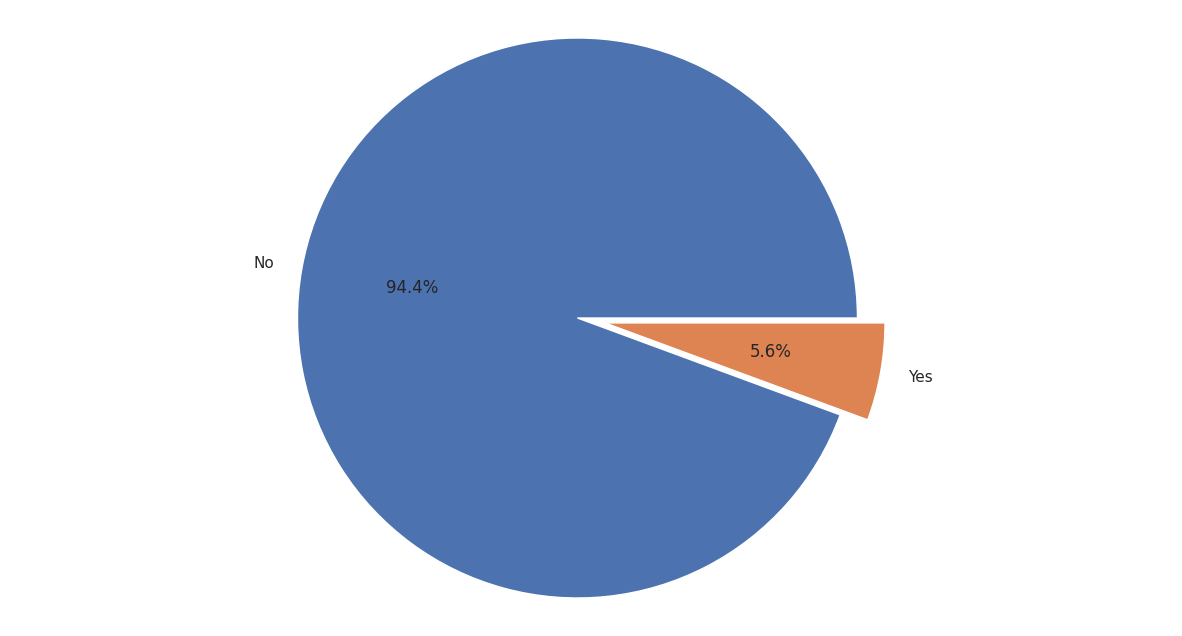

Total number of customers in the training set: 14400
No     13590
Yes      810
Name: Offer Accepted, dtype: int64


In [223]:
target =trainset['Offer Accepted'].value_counts()
fig1, ax1 = plt.subplots()
ax1.pie(target, labels = target.index, autopct = '%1.1f%%', shadow = False, explode = [0.1, 0])
ax1.axis('equal')
plt.show()
print('Total number of customers in the training set:', trainset['Offer Accepted'].count())
print(trainset['Offer Accepted'].value_counts())

In [224]:
import matplotlib.ticker as mtick

In [225]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#----plotting libraries----
import seaborn as sns
import matplotlib.pyplot as plt

In [226]:
trainset.columns

Index(['Customer Number', 'Offer Accepted', 'Reward', 'Mailer Type',
       'Income Level', '# Bank Accounts Open', 'Overdraft Protection',
       'Credit Rating', '# Credit Cards Held', '# Homes Owned',
       'Household Size', 'Own Your Home', 'Average Balance', 'Q1 Balance',
       'Q2 Balance', 'Q3 Balance', 'Q4 Balance'],
      dtype='object')

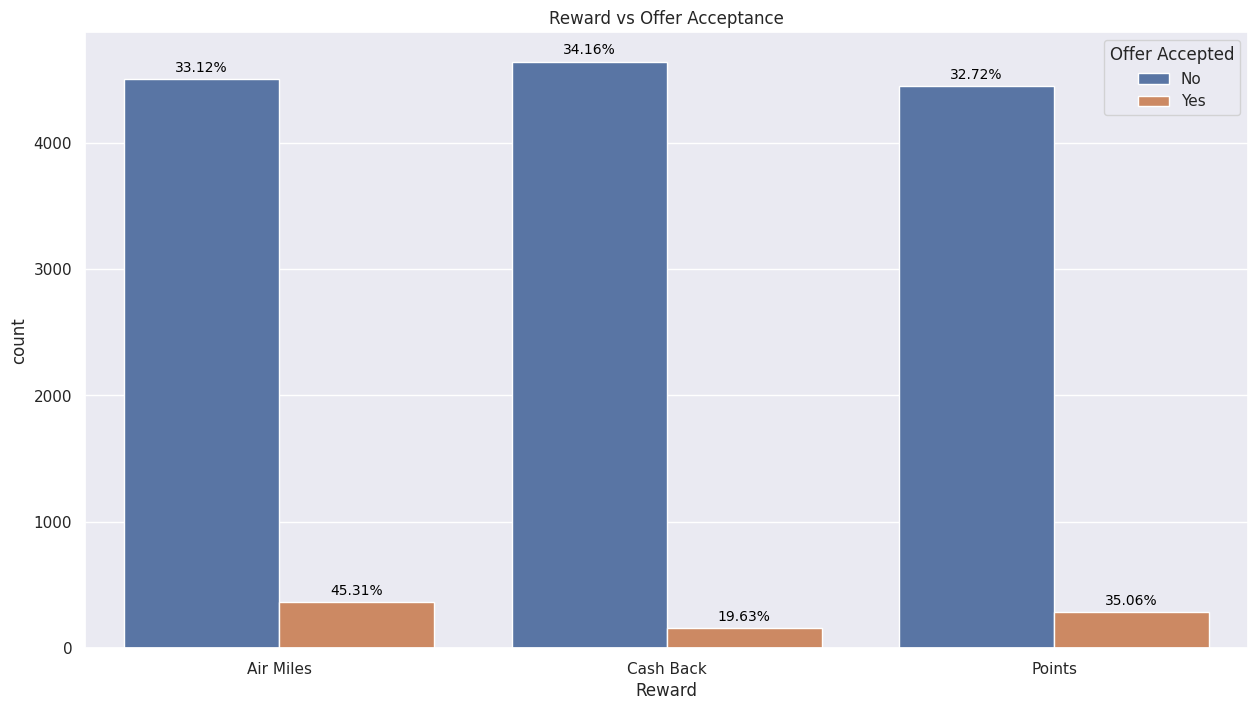

In [227]:
ax = sns.countplot(x='Reward', hue='Offer Accepted', data=trainset)


total_counts = trainset['Reward'].value_counts()
for container in ax.containers:
    total = sum([bar.get_height() for bar in container])
    for bar in container:
        percentage = f'{bar.get_height() / total * 100:.2f}%'
        ax.annotate(percentage,
                    xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10, color='black')

sns.set(rc={'figure.figsize': (15, 8)})
plt.title('Reward vs Offer Acceptance')
plt.show()

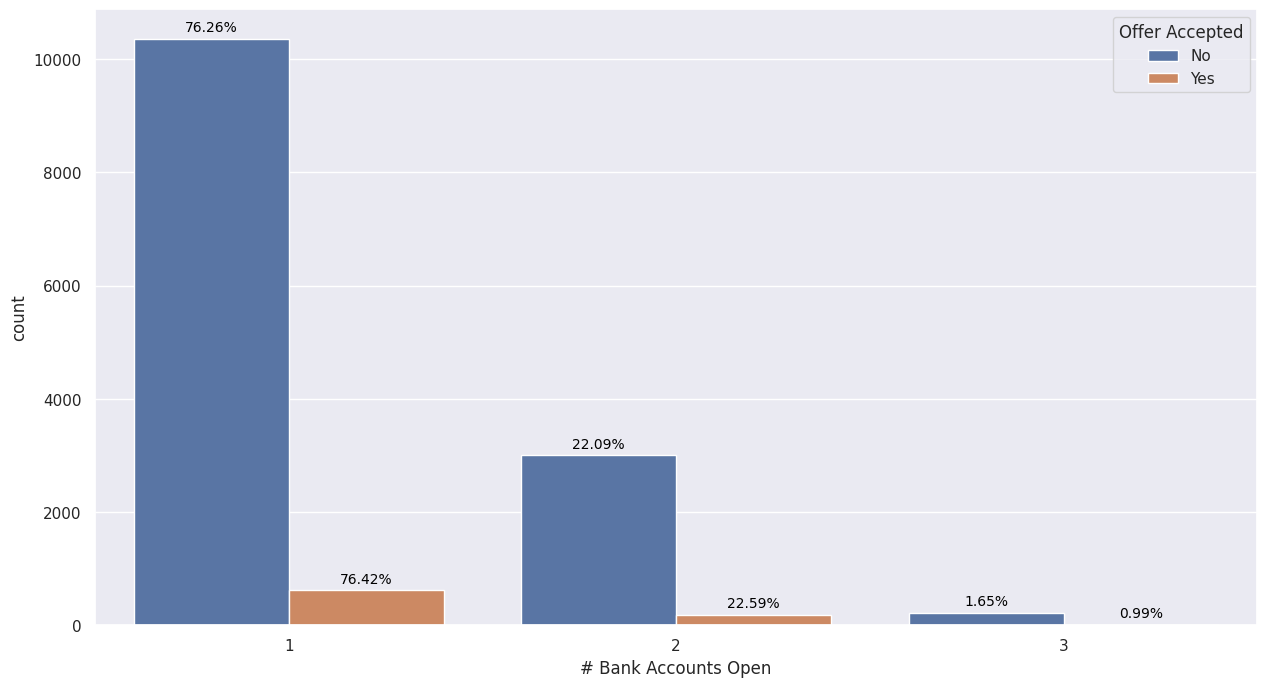

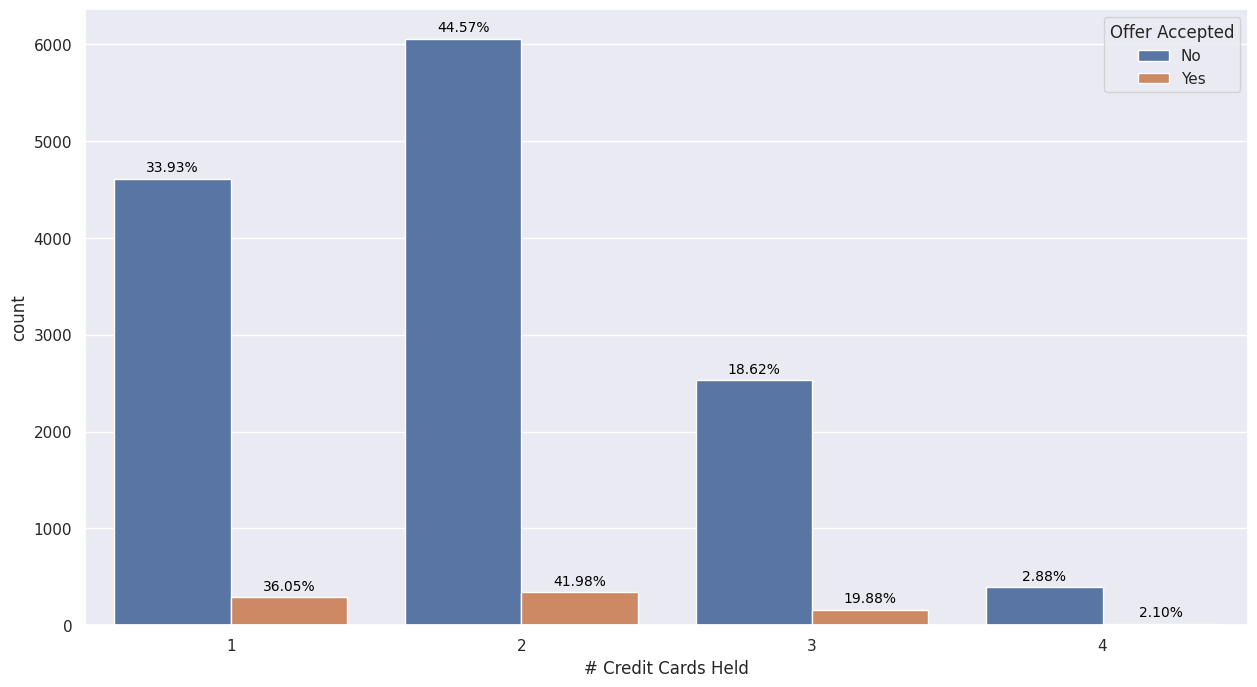

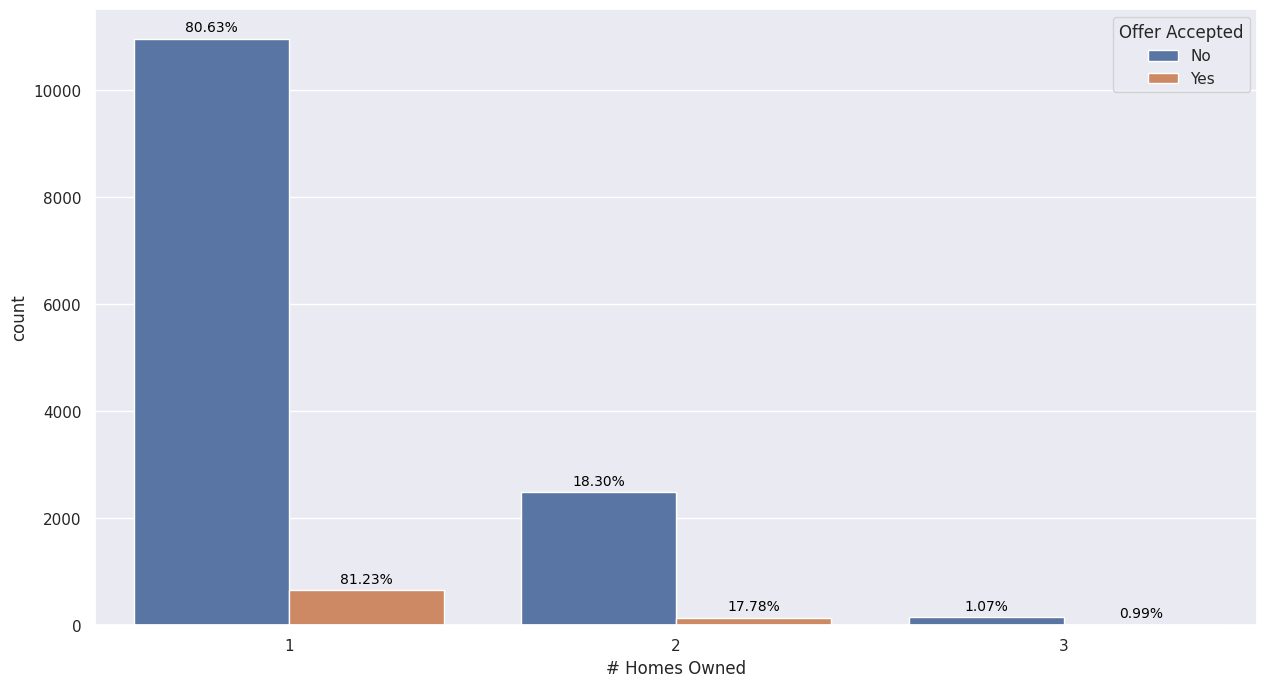

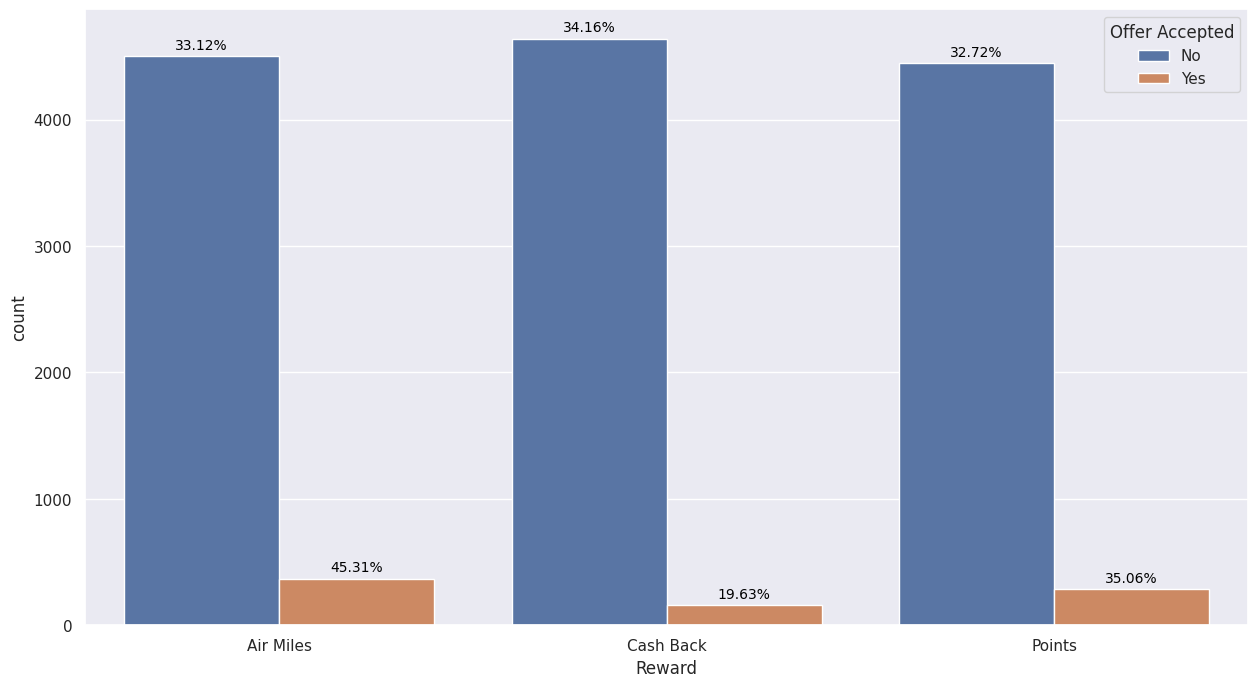

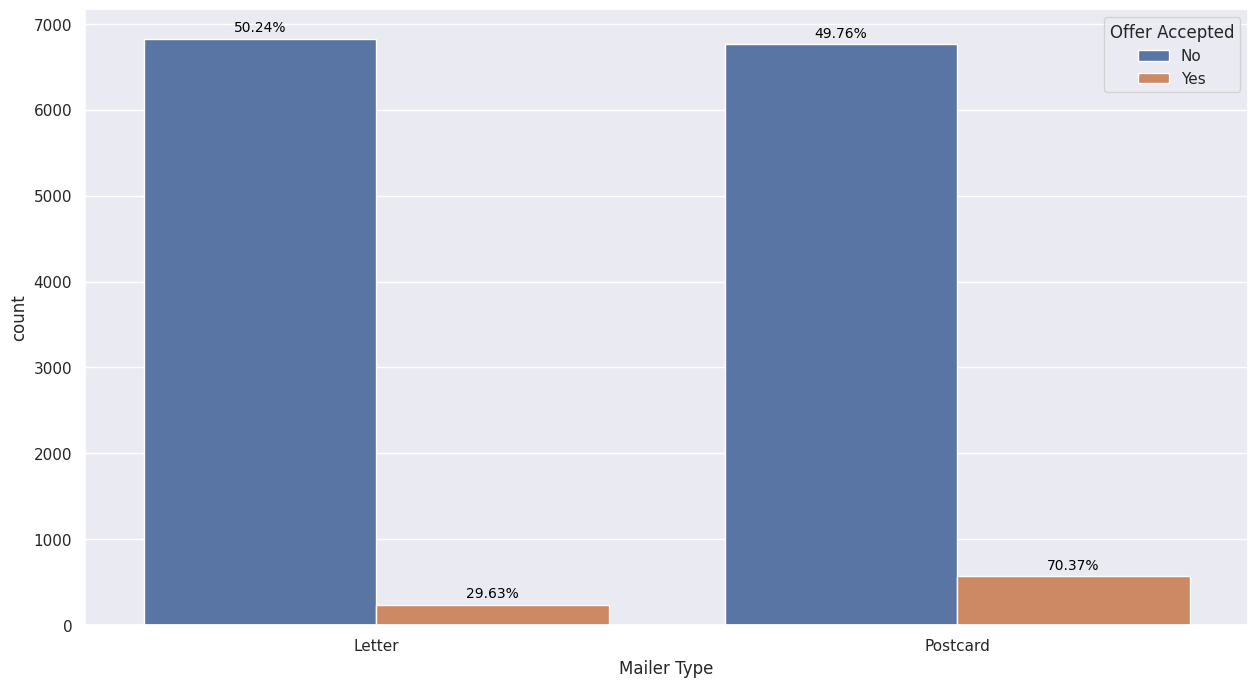

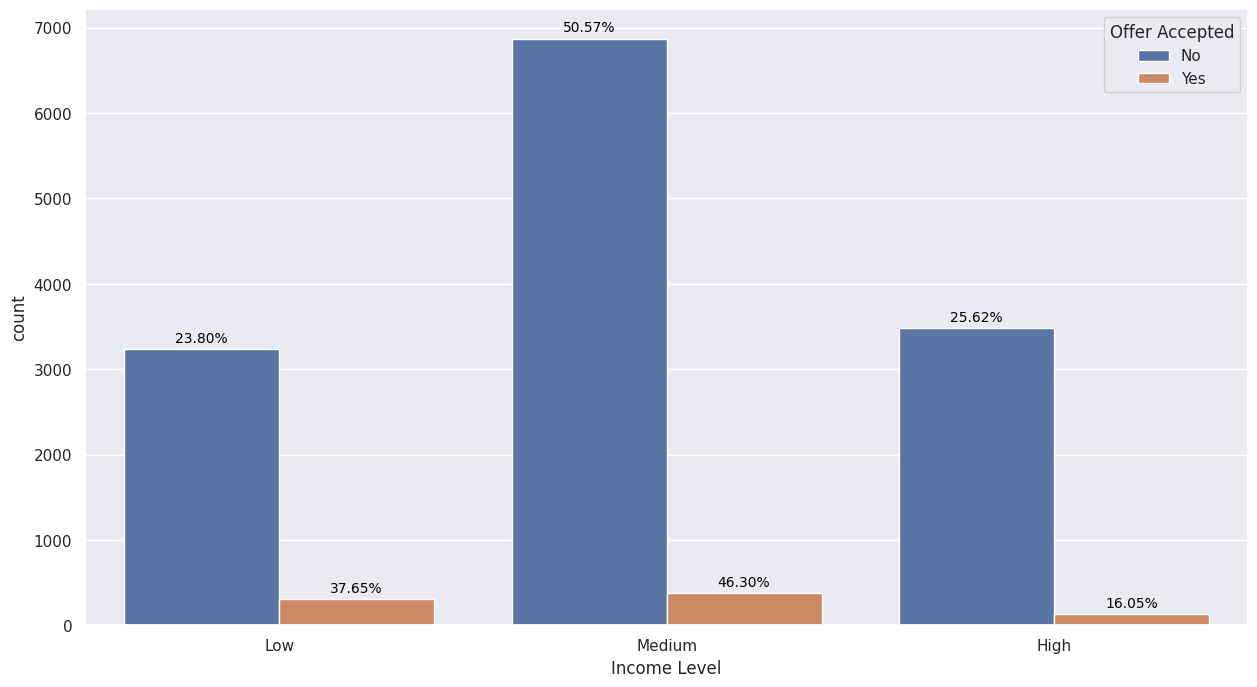

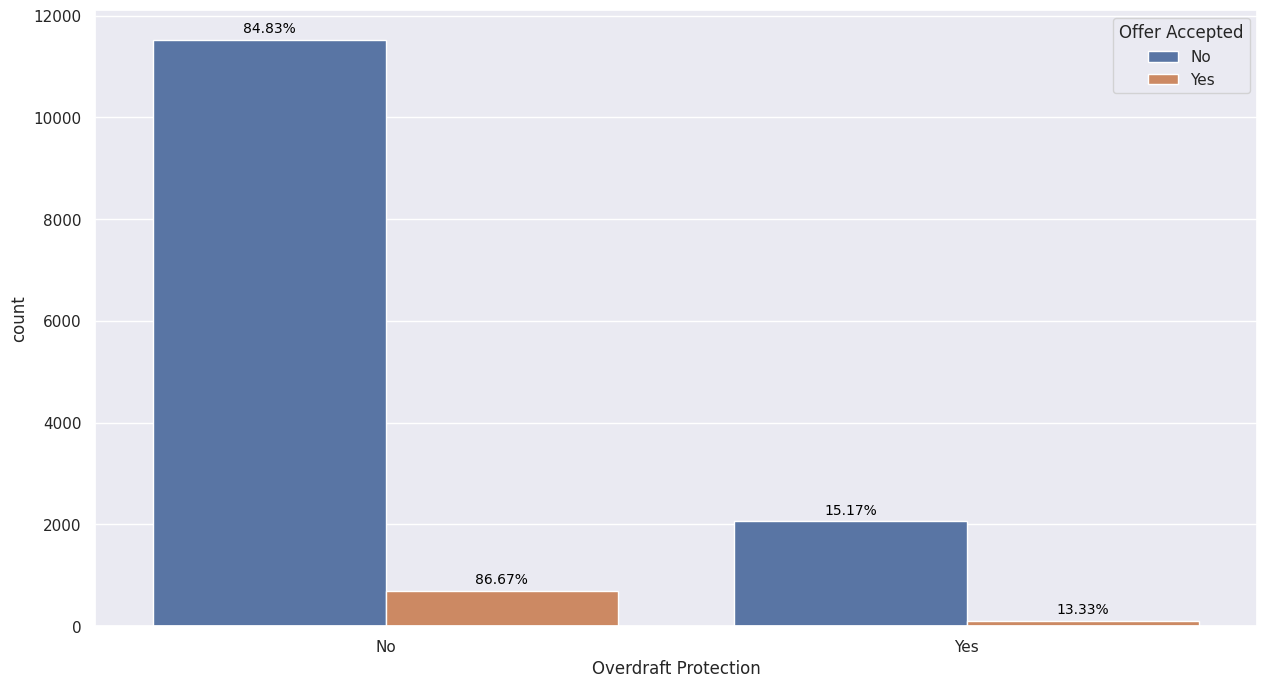

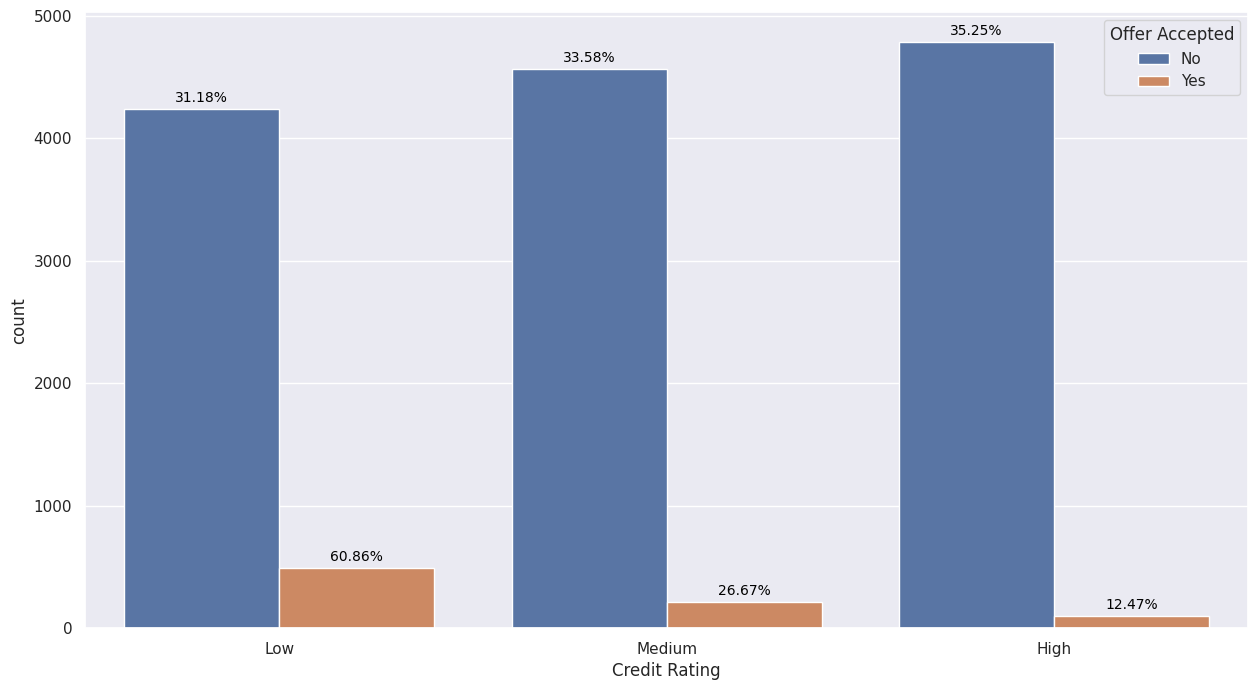

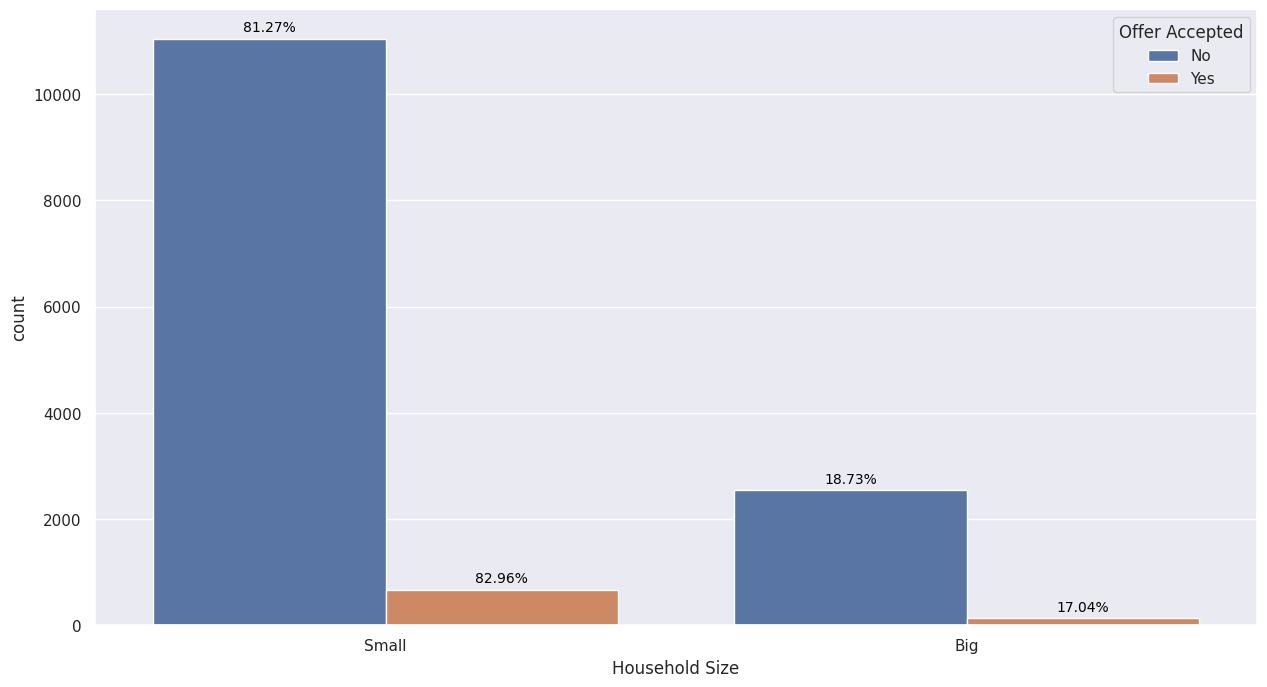

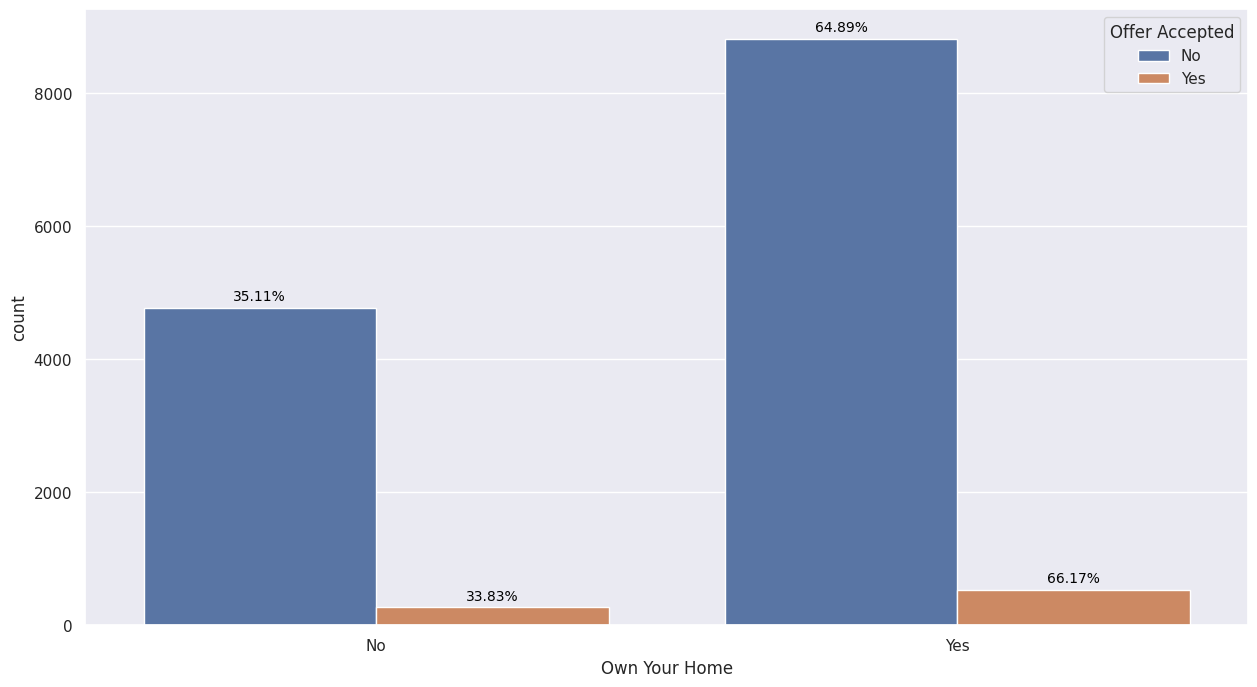

In [228]:
categorical_col=['# Bank Accounts Open','# Credit Cards Held', '# Homes Owned','Reward', 'Mailer Type','Income Level','Overdraft Protection','Credit Rating',
                 'Household Size', 'Own Your Home']
for column in categorical_col:
    ax = sns.countplot(x=column, hue='Offer Accepted', data=trainset)


    total_counts = trainset[column].value_counts()
    for container in ax.containers:
        total = sum([bar.get_height() for bar in container])
        for bar in container:
            percentage = f'{bar.get_height() / total * 100:.2f}%'
            ax.annotate(percentage,
                    xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10, color='black')

    sns.set(rc={'figure.figsize': (15, 8)})
    #plt.title(column,'  vs Offer Acceptance')
    plt.show()

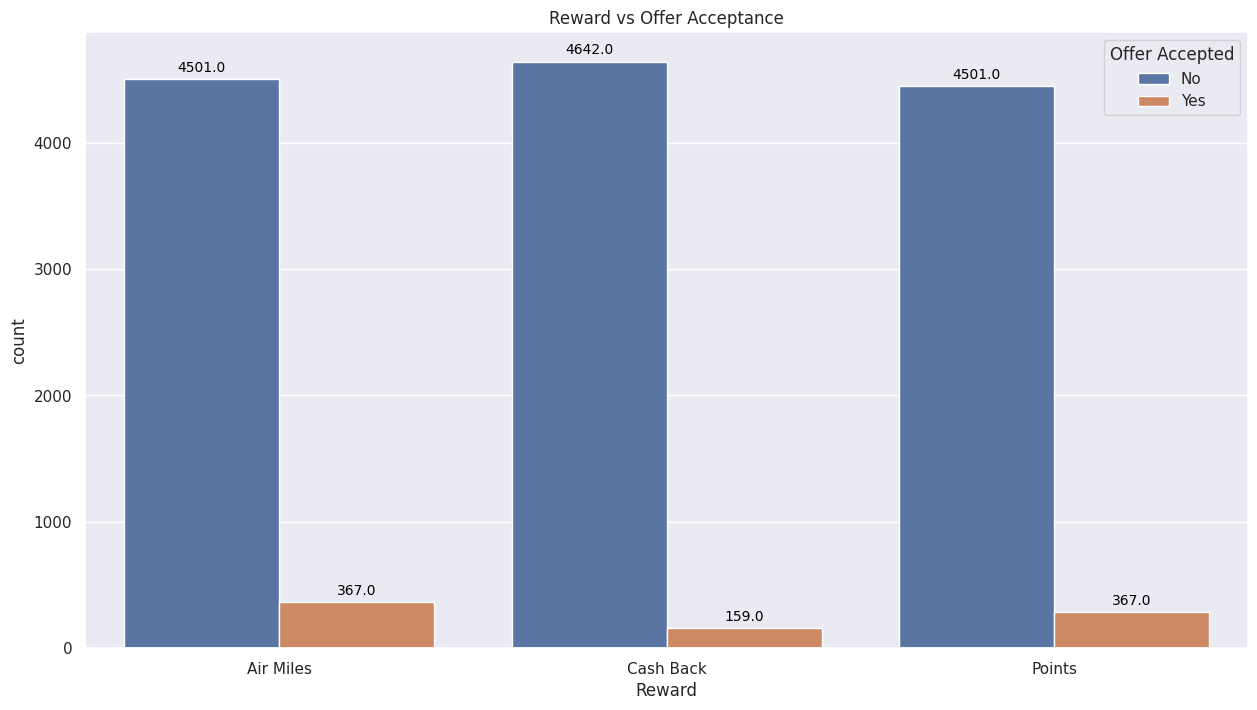

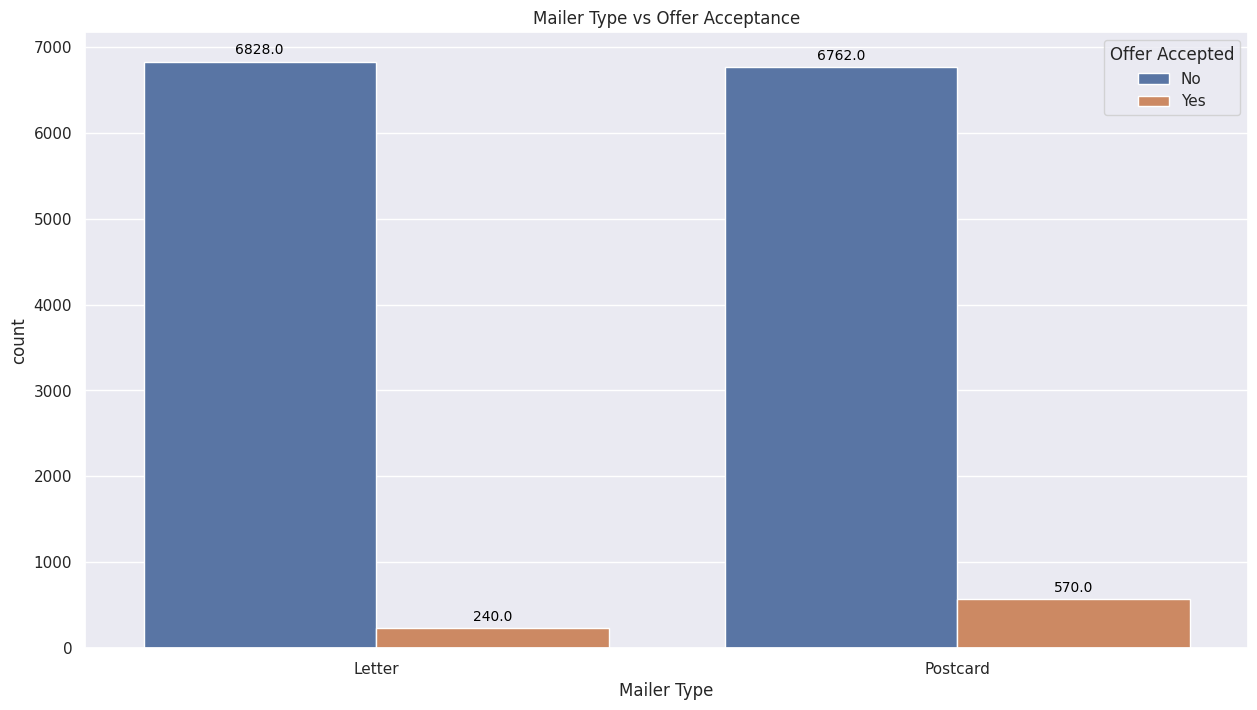

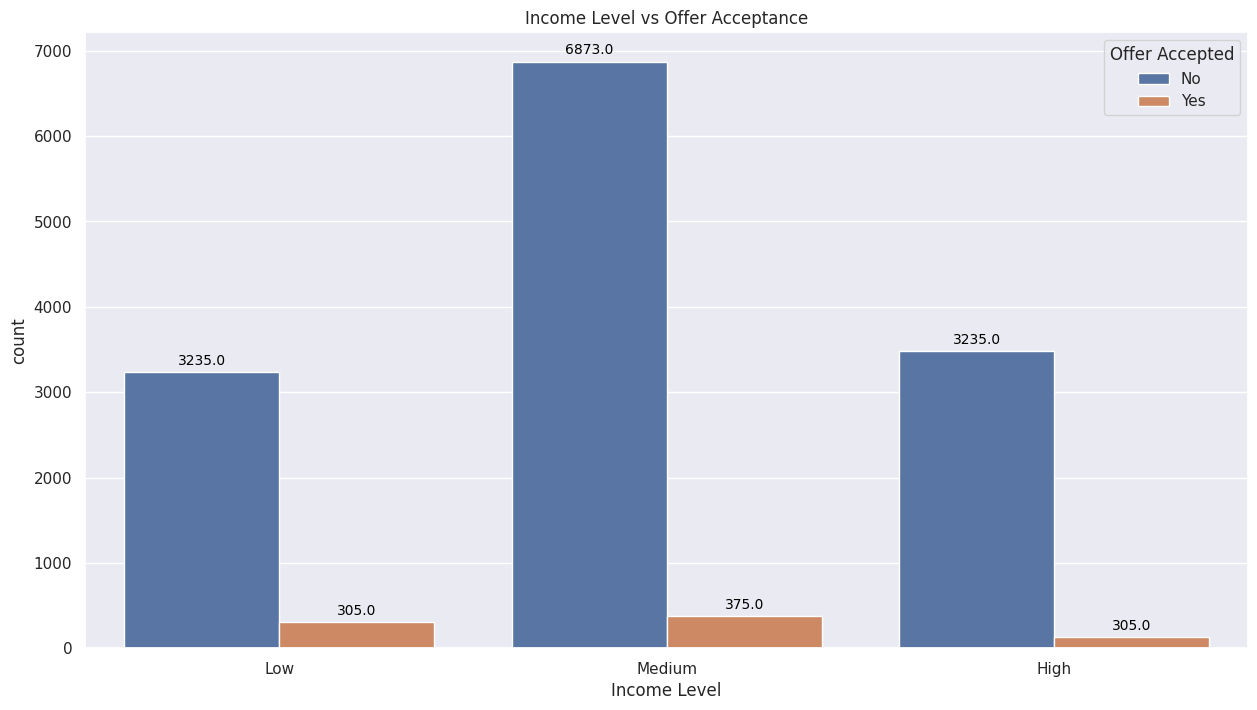

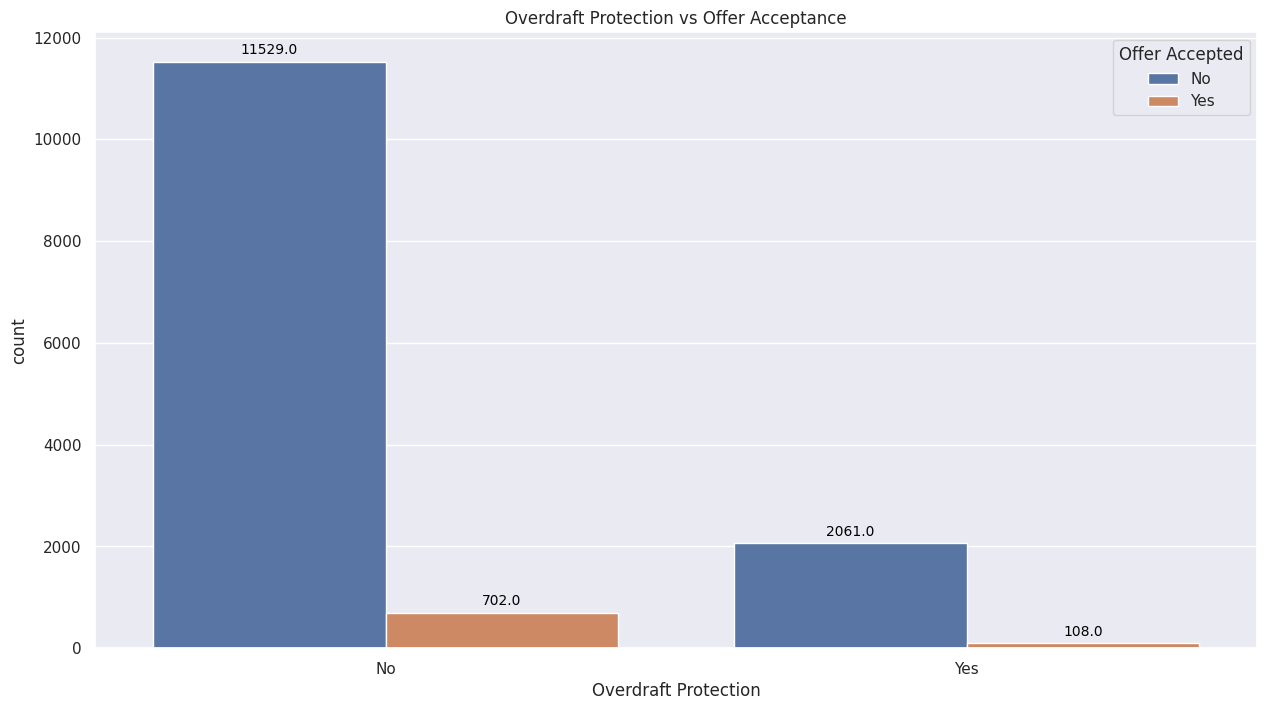

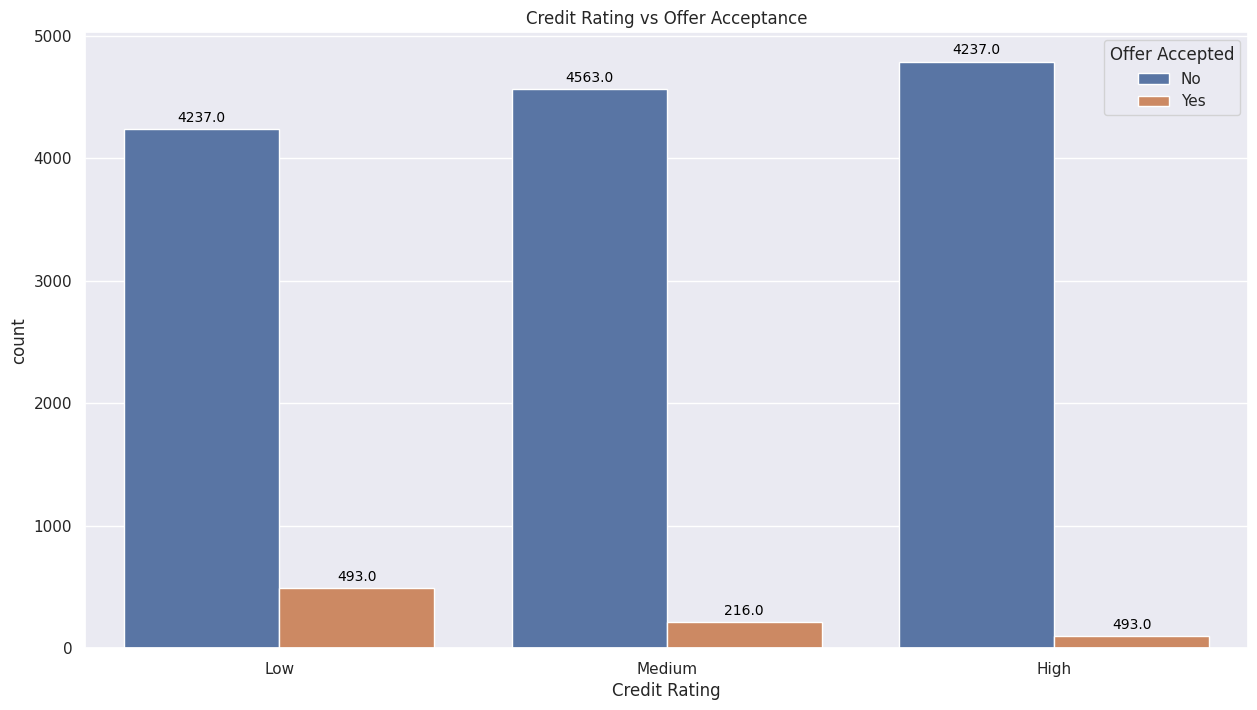

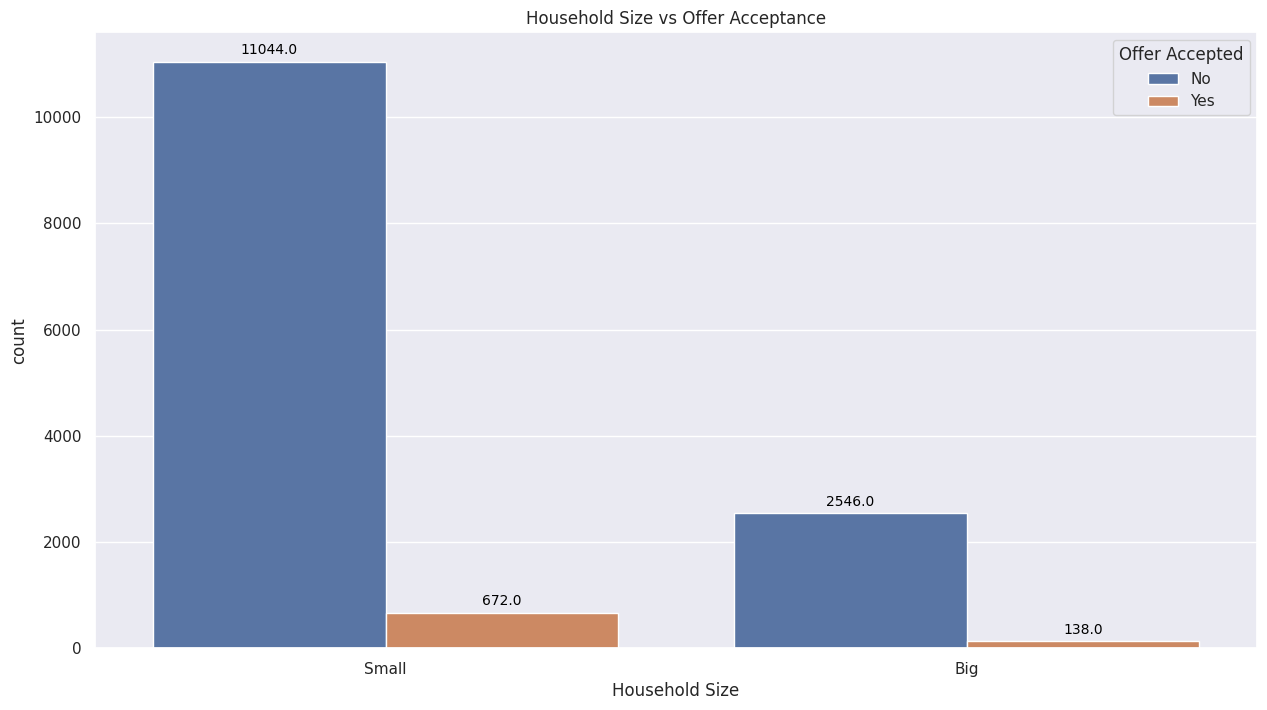

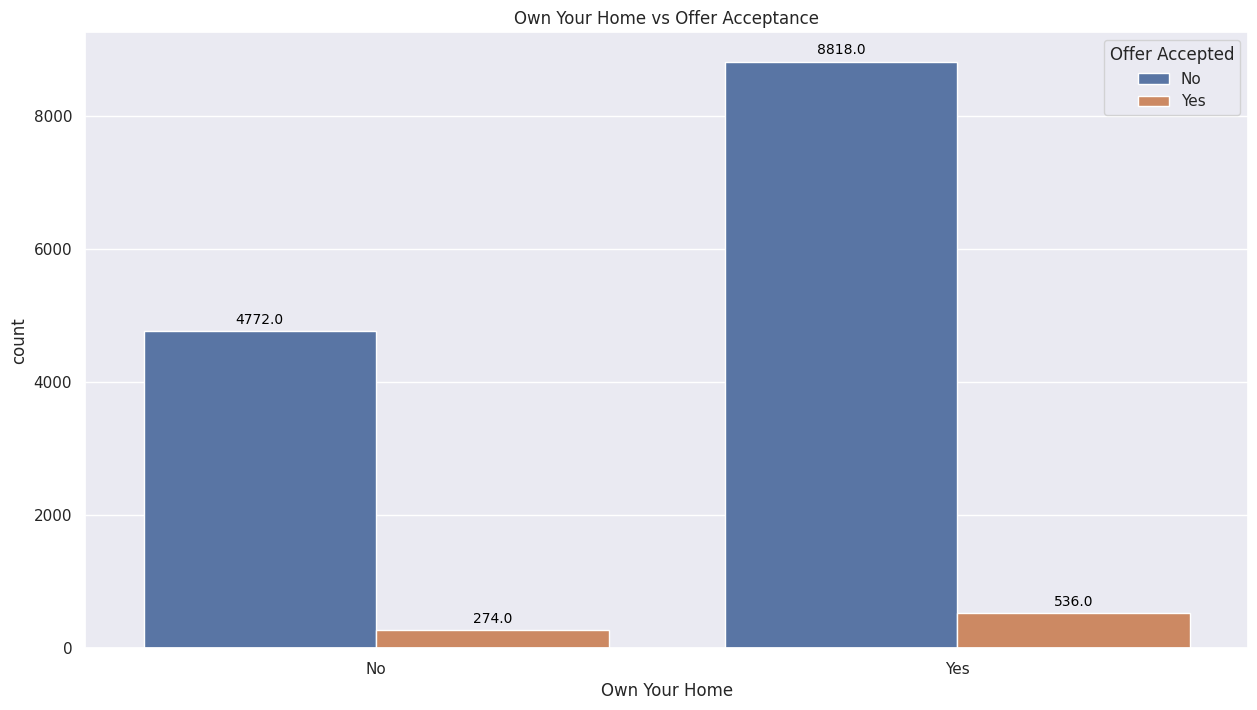

In [229]:
col = ['Reward', 'Mailer Type', 'Income Level', 'Overdraft Protection', 'Credit Rating', 'Household Size', 'Own Your Home']

# Set the figure size before creating the subplots
sns.set(rc={'figure.figsize': (15, 8)})

for column in col:
    ax = sns.countplot(x=column, hue='Offer Accepted', data=trainset)

    for container in ax.containers:
        total_heights = [bar.get_height() for bar in container]
        yes_total = total_heights[1] if len(total_heights) > 1 else 0  # Count 'Yes' values
        no_total = total_heights[0] if len(total_heights) > 0 else 0  # Count 'No' values

        for i, bar in enumerate(container):
            total = yes_total if i % 2 == 1 else no_total  # Assign the 'Yes' or 'No' total based on bar position
            ax.annotate(total,
                xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10, color='black')

    plt.title(f'{column} vs Offer Acceptance')
    plt.show()

In [230]:
trainset.columns

Index(['Customer Number', 'Offer Accepted', 'Reward', 'Mailer Type',
       'Income Level', '# Bank Accounts Open', 'Overdraft Protection',
       'Credit Rating', '# Credit Cards Held', '# Homes Owned',
       'Household Size', 'Own Your Home', 'Average Balance', 'Q1 Balance',
       'Q2 Balance', 'Q3 Balance', 'Q4 Balance'],
      dtype='object')

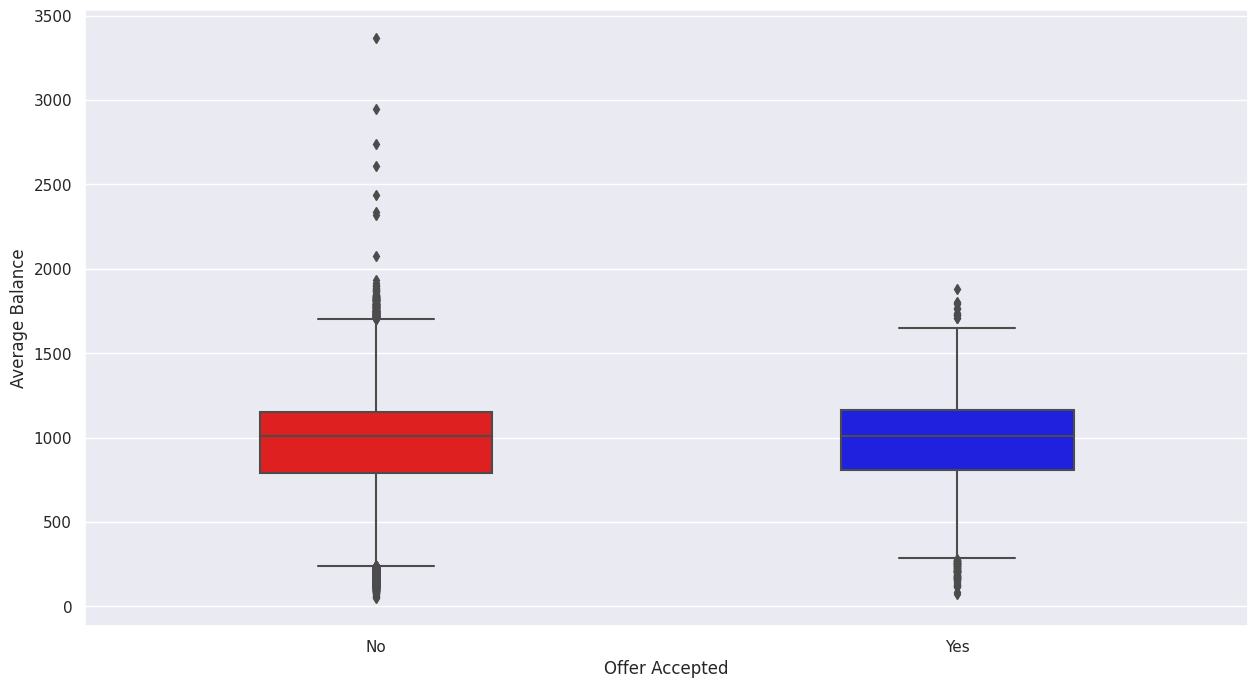

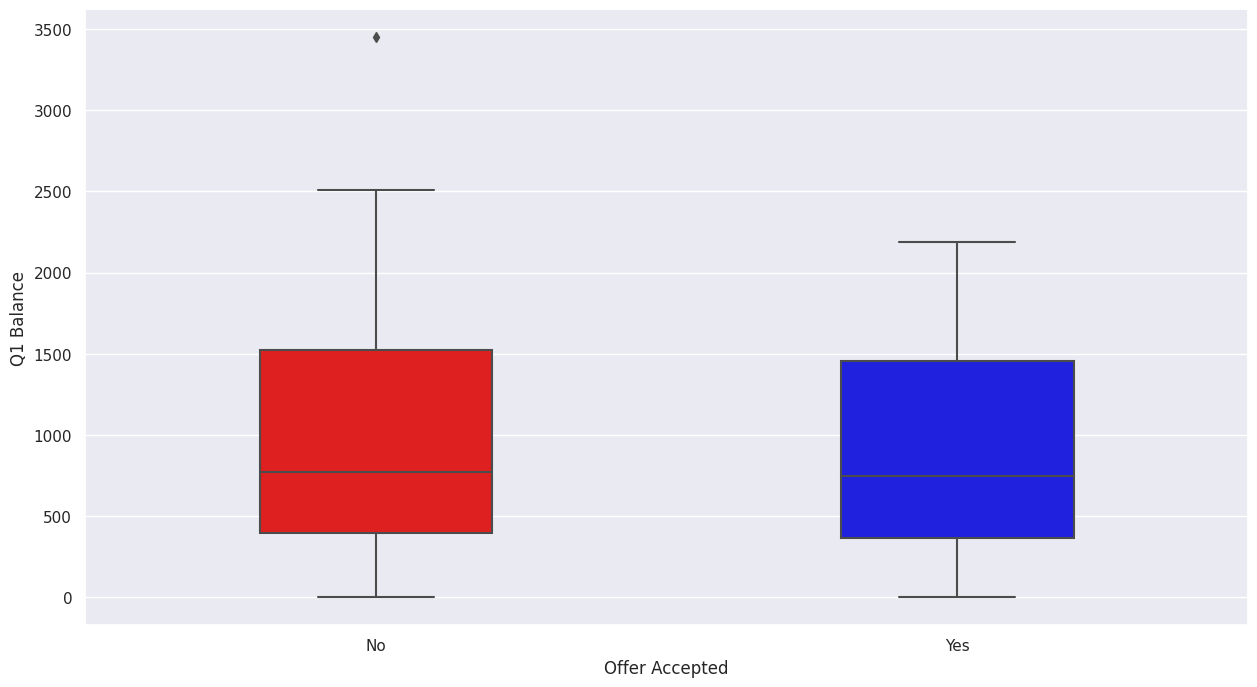

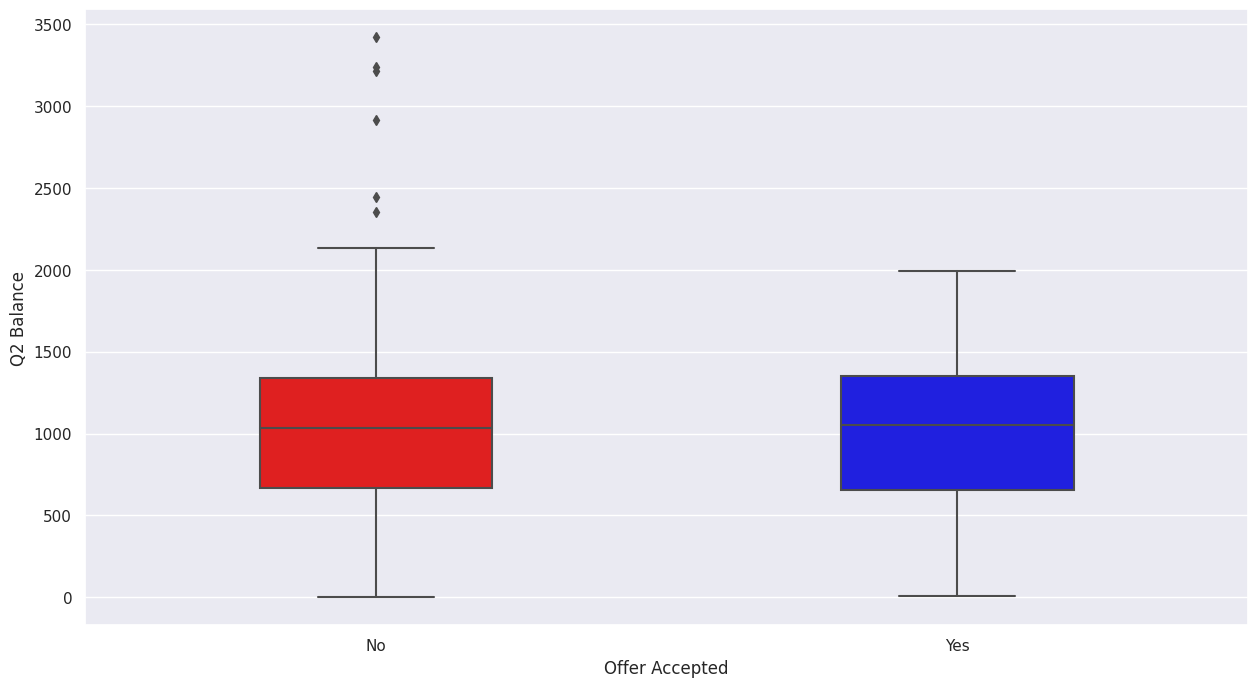

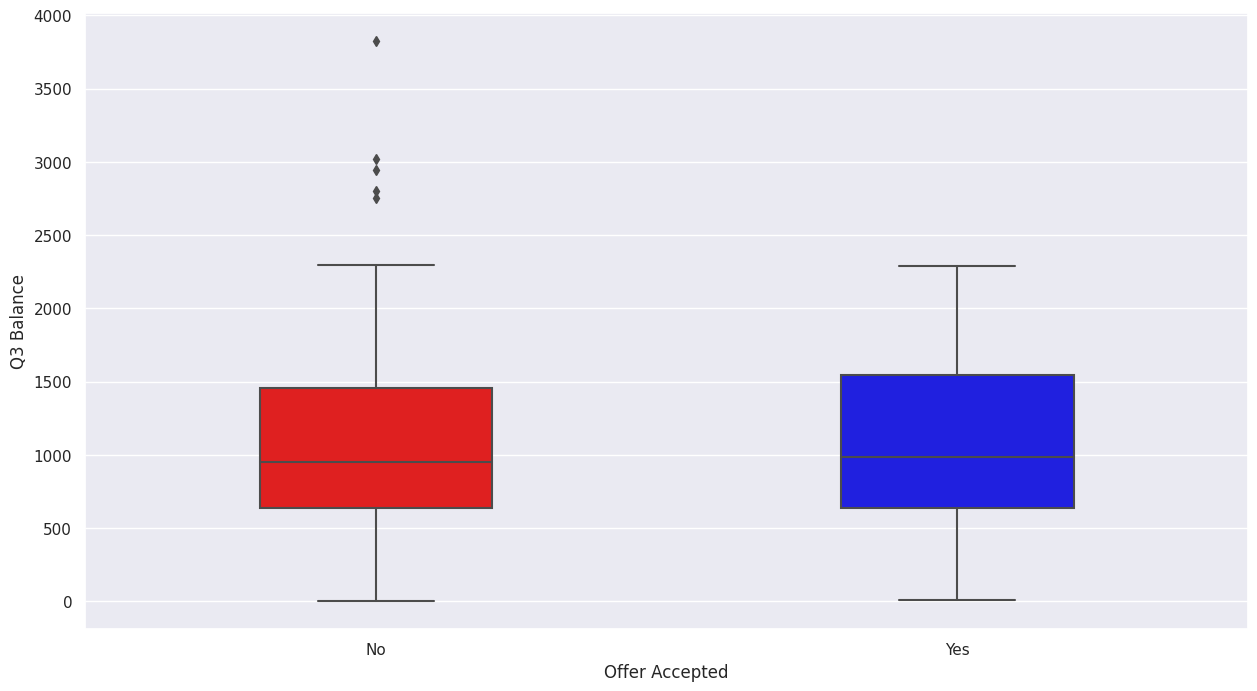

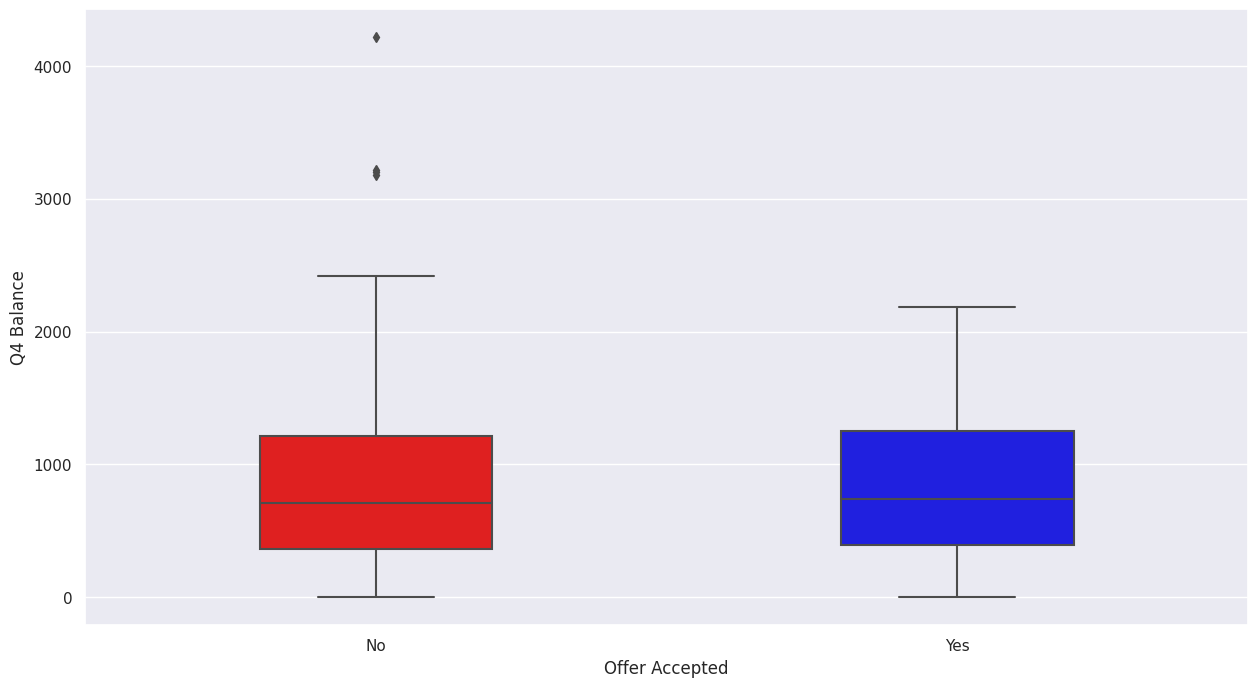

In [231]:
numerical_col=['Average Balance', 'Q1 Balance',
       'Q2 Balance', 'Q3 Balance', 'Q4 Balance']
for column in numerical_col:
    ax = sns.boxplot(x='Offer Accepted', y=column, data=trainset, palette=["red", "blue"], width=0.4)
    plt.show()

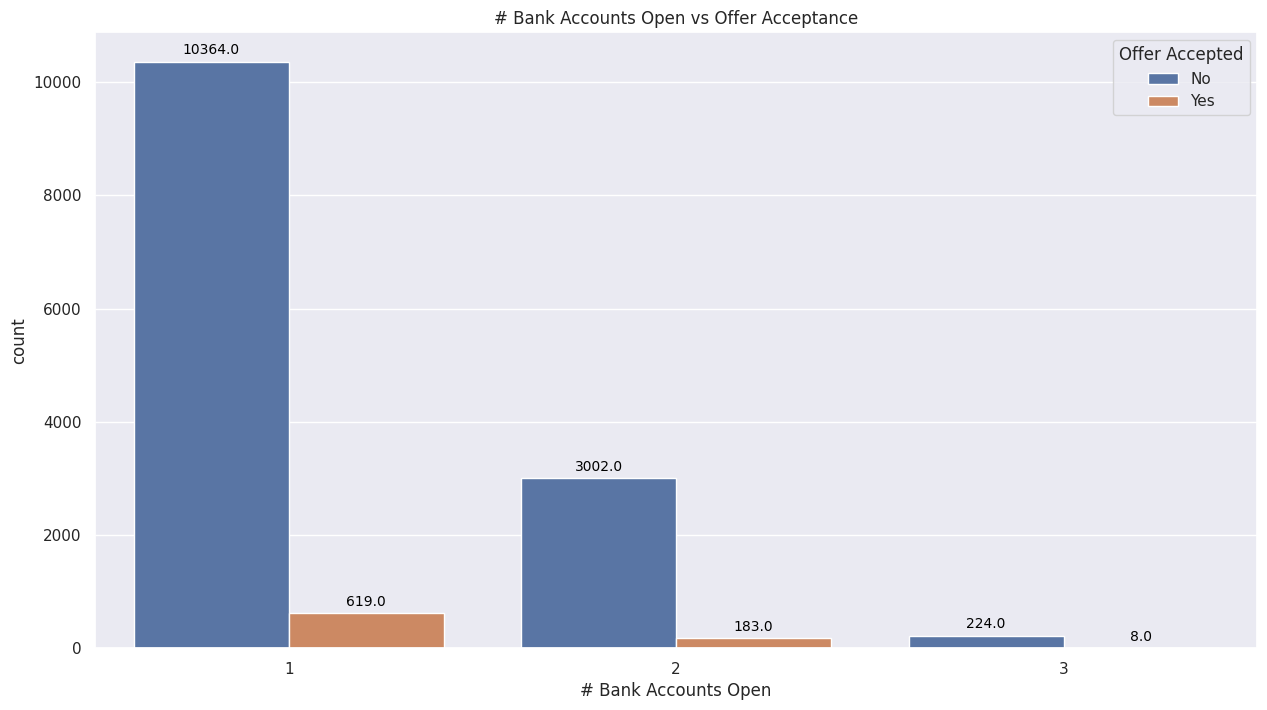

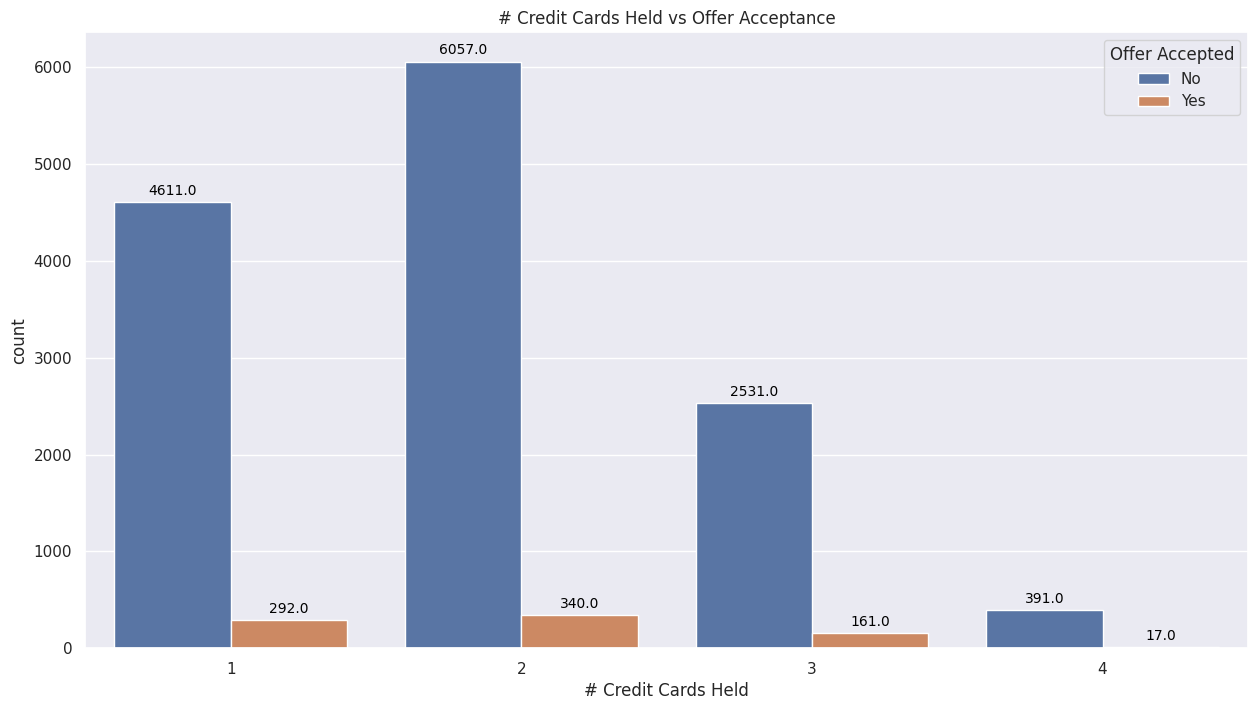

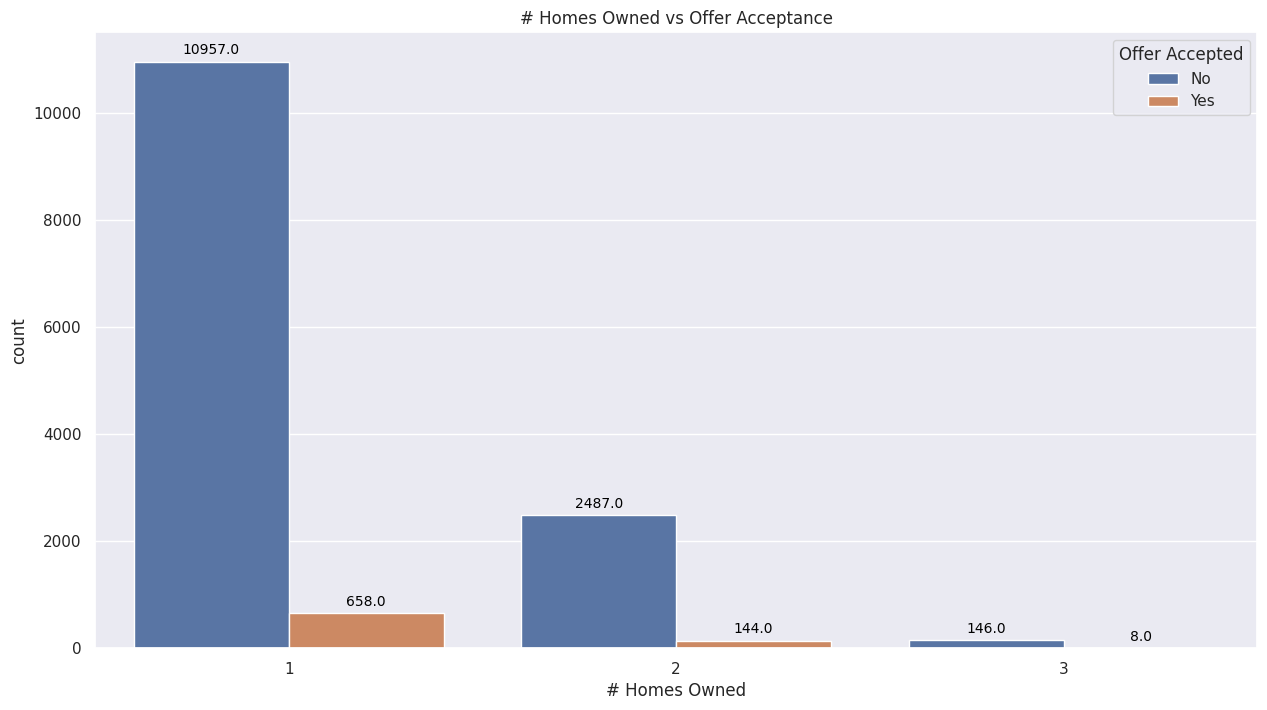

In [232]:
numerical_cols = ['# Bank Accounts Open', '# Credit Cards Held', '# Homes Owned']
response_categories = ['No', 'Yes']

sns.set(rc={'figure.figsize': (15, 8)})

for column in numerical_cols:
    ax = sns.countplot(x=column, hue='Offer Accepted', data=trainset, hue_order=response_categories)

    for container in ax.containers:
        for i, bar in enumerate(container):
            total = bar.get_height()
            ax.annotate(total,
                xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10, color='black')

    plt.title(f'{column} vs Offer Acceptance')
    plt.show()

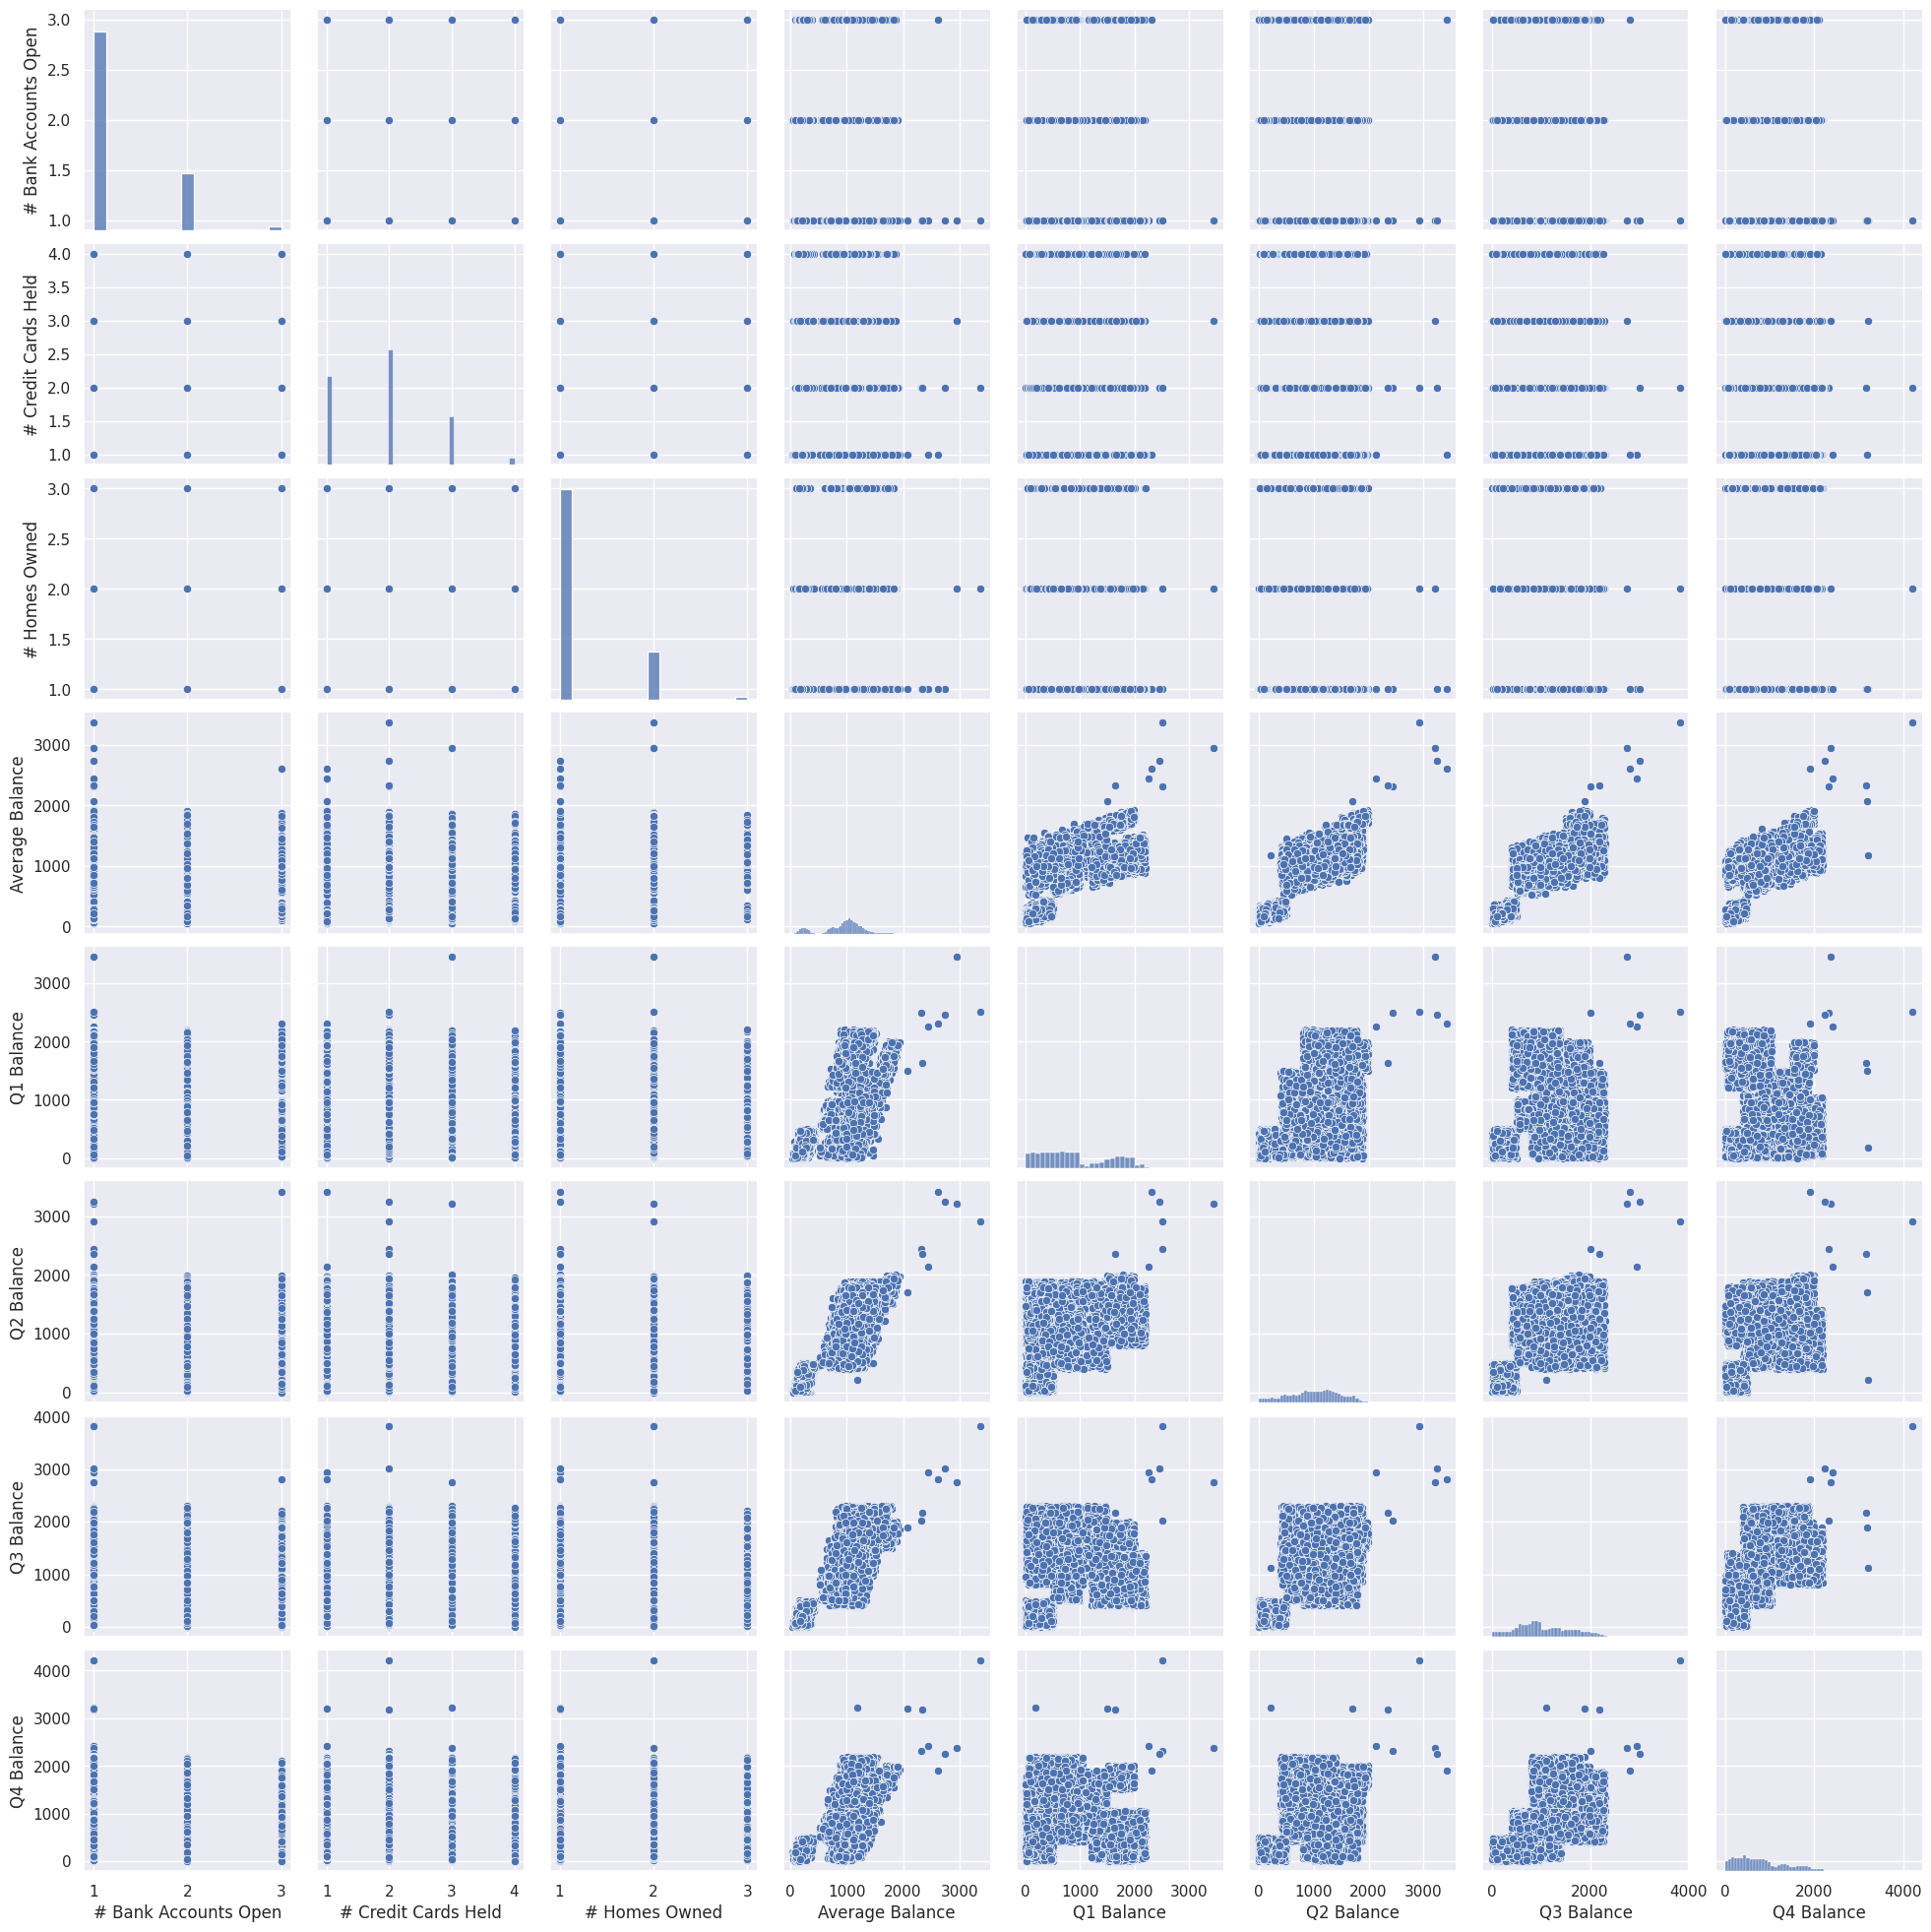

In [233]:
columns_to_plot = ['# Bank Accounts Open', '# Credit Cards Held', '# Homes Owned', 'Average Balance', 'Q1 Balance', 'Q2 Balance', 'Q3 Balance', 'Q4 Balance']

sns.pairplot(trainset[columns_to_plot])
plt.show()

MCA

In [234]:
from prince import MCA

In [235]:
mca_cols = trainset.select_dtypes(['category']).columns
print(len(mca_cols), 'features used for MCA are', mca_cols.tolist())

8 features used for MCA are ['Offer Accepted', 'Reward', 'Mailer Type', 'Income Level', 'Overdraft Protection', 'Credit Rating', 'Household Size', 'Own Your Home']


In [236]:
df_encoded = pd.get_dummies(df, mca_cols)


In [237]:
df_encoded = df_encoded.drop(columns=['Customer Number'])

In [238]:
# instantiate MCA class
mca = prince.MCA()
mca_data=trainset[mca_cols]
mca_data.head()
# get principal components
mca1 = mca.fit(mca_data)

In [239]:
mca.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.151,10.98%,10.98%
1,0.130,9.43%,20.41%


In [240]:
row_coordinates=mca.row_coordinates(mca_data)
row_coordinates

,0,1
1921,-0.142559,0.181082
5732,-0.544255,0.187676
2455,0.032399,-0.052593
12131,0.249859,0.002043
16612,-0.105362,-0.446296
...,...,...
11284,-0.072322,0.187437
11964,-0.569912,-0.749772
5390,-0.145069,0.403878
860,-0.221849,0.185278


In [241]:
column_coordinates=mca.column_coordinates(mca_data)
column_coordinates

,0,1
Offer Accepted_No,-0.190723,-0.004322
Offer Accepted_Yes,3.199908,0.072518
Reward_Air Miles,0.326124,-0.227083
Reward_Cash Back,-0.403160,-0.284071
Reward_Points,0.073557,0.521933
Mailer Type_Letter,-0.375299,0.297808
Mailer Type_Postcard,0.361786,-0.287085
Income Level_Low,0.426241,-0.083296
Income Level_Medium,-0.064362,0.489505
Income Level_High,-0.288594,-0.900627


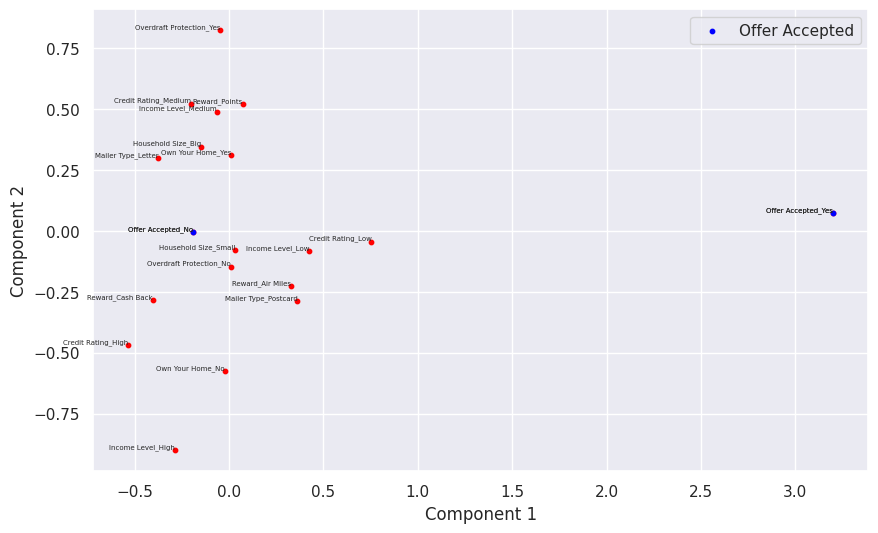

In [242]:
# Plot column coordinates with labels
plt.figure(figsize=(10, 6))
plt.scatter(column_coordinates[0], column_coordinates[1], marker='o', s=10, color='red')

# Add labels for each category (all six categories of the 'class' variable)
for label, x, y in zip(column_coordinates.index, column_coordinates[0], column_coordinates[1]):
    plt.text(x, y, label, fontsize=5, ha='right', va='bottom')

# Highlight the 'class' variable's categories with a different color (e.g., blue triangles)
classes_to_highlight = ['Offer Accepted_No', 'Offer Accepted_Yes']
class_coordinates_to_highlight = column_coordinates.loc[classes_to_highlight]
plt.scatter(class_coordinates_to_highlight[0], class_coordinates_to_highlight[1], marker='o', s=10, color='blue', label='Offer Accepted')

# Add labels for the highlighted 'class' variable's categories
for label, x, y in zip(classes_to_highlight, class_coordinates_to_highlight[0], class_coordinates_to_highlight[1]):
    plt.text(x, y, label, fontsize=5, ha='right', va='bottom')

# Add axis labels and title
plt.xlabel('Component 1')
plt.ylabel('Component 2')


# Show the plot
plt.legend()
plt.show()

PLS - DA

In [243]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [244]:
X_train = trainset.drop('Offer Accepted', axis=1)
y_train = trainset['Offer Accepted']
X_test = testset.drop('Offer Accepted', axis=1)
y_test = testset['Offer Accepted']

In [245]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'y_train' is a column with string labels
label_encoder = LabelEncoder()
X_train_encoded = pd.get_dummies(X_train)
y_train_encoded = label_encoder.fit_transform(y_train)
X_test_encoded = pd.get_dummies(X_test)
y_test_encoded = label_encoder.fit_transform(y_test)

In [246]:
n_components = 2  # You can choose the number of components
plsda = PLSRegression(n_components=n_components)

In [247]:
# Fit the model to the training data
plsda.fit(X_train_encoded, y_train_encoded)

# Transform the data to PLS-DA components
X_train_plsda = plsda.transform(X_train_encoded)
X_test_plsda = plsda.transform(X_test_encoded)

In [248]:
# Get the scores of the first two components
scores = plsda.fit(X_train_encoded, y_train_encoded).x_scores_[:, :2]

# Calculate the total variance of the input data
total_variance = np.var(X_train_encoded, axis=0).sum()

# Calculate the variance of the scores
scores_variance = np.var(scores, axis=0).sum()
scores_variance

# Calculate the proportion of variance explained by the first two components
variance_explained = scores_variance / total_variance

print(f"Variance explained by the first two components: {variance_explained * 100}%")

Variance explained by the first two components: 1.1904370635659552e-05%


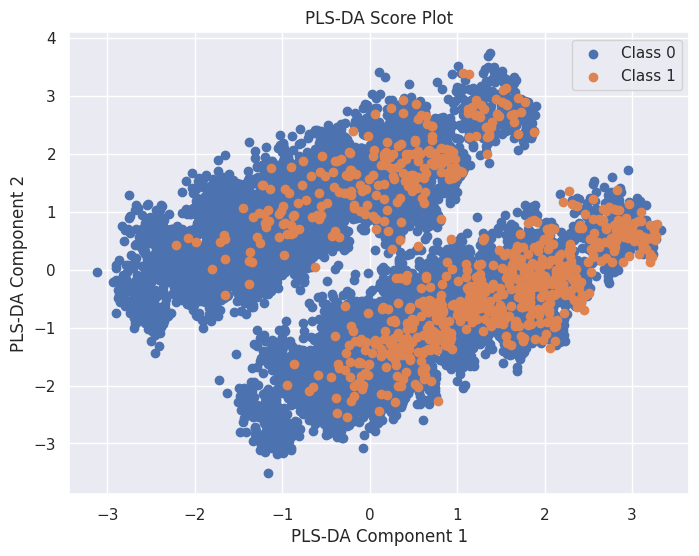

In [249]:
import matplotlib.pyplot as plt

# Get unique class labels
unique_classes = np.unique(y_train_encoded)

# Create a scatter plot of the first two PLS-DA components (score plot) for each class
plt.figure(figsize=(8, 6))
for cls in unique_classes:
    mask = (y_train_encoded == cls)
    plt.scatter(X_train_plsda[mask, 0], X_train_plsda[mask, 1], label=f'Class {cls}')

plt.title('PLS-DA Score Plot')
plt.xlabel('PLS-DA Component 1')
plt.ylabel('PLS-DA Component 2')
plt.legend()
plt.grid(True)
plt.show()

Correlation

In [254]:
corr_matrix = trainset.corr(method='pearson')
print(corr_matrix)

                      Customer Number  # Bank Accounts Open  \
Customer Number              1.000000             -0.008541   
# Bank Accounts Open        -0.008541              1.000000   
# Credit Cards Held         -0.011093             -0.003437   
# Homes Owned               -0.003819              0.006970   
Average Balance              0.013721             -0.001169   
Q1 Balance                   0.017651             -0.007259   
Q2 Balance                   0.016276             -0.005939   
Q3 Balance                   0.010095              0.002621   
Q4 Balance                  -0.008385              0.007349   

                      # Credit Cards Held  # Homes Owned  Average Balance  \
Customer Number                 -0.011093      -0.003819         0.013721   
# Bank Accounts Open            -0.003437       0.006970        -0.001169   
# Credit Cards Held              1.000000       0.000961        -0.000339   
# Homes Owned                    0.000961       1.000000     

In [255]:
from scipy.stats import spearmanr

In [256]:
trainset.corr(numeric_only=True, method='spearman')

,Customer Number,# Bank Accounts Open,# Credit Cards Held,# Homes Owned,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
Customer Number,1.000000,-0.006692,-0.010288,-0.001841,0.016357,0.017181,0.016212,0.008947,-0.006936
# Bank Accounts Open,-0.006692,1.000000,-0.005014,0.009385,-0.002908,-0.008826,-0.009764,0.003059,0.009908
# Credit Cards Held,-0.010288,-0.005014,1.000000,0.003946,0.005245,-0.007993,-0.006643,-0.004607,0.014592
# Homes Owned,-0.001841,0.009385,0.003946,1.000000,0.016528,0.015224,0.009849,0.001982,0.002572
Average Balance,0.016357,-0.002908,0.005245,0.016528,1.000000,0.422753,0.723376,0.739607,0.565081
Q1 Balance,0.017181,-0.008826,-0.007993,0.015224,0.422753,1.000000,0.459369,-0.024093,-0.179578
Q2 Balance,0.016212,-0.009764,-0.006643,0.009849,0.723376,0.459369,1.000000,0.450864,0.146854
Q3 Balance,0.008947,0.003059,-0.004607,0.001982,0.739607,-0.024093,0.450864,1.000000,0.627871
Q4 Balance,-0.006936,0.009908,0.014592,0.002572,0.565081,-0.179578,0.146854,0.627871,1.000000


<Axes: >

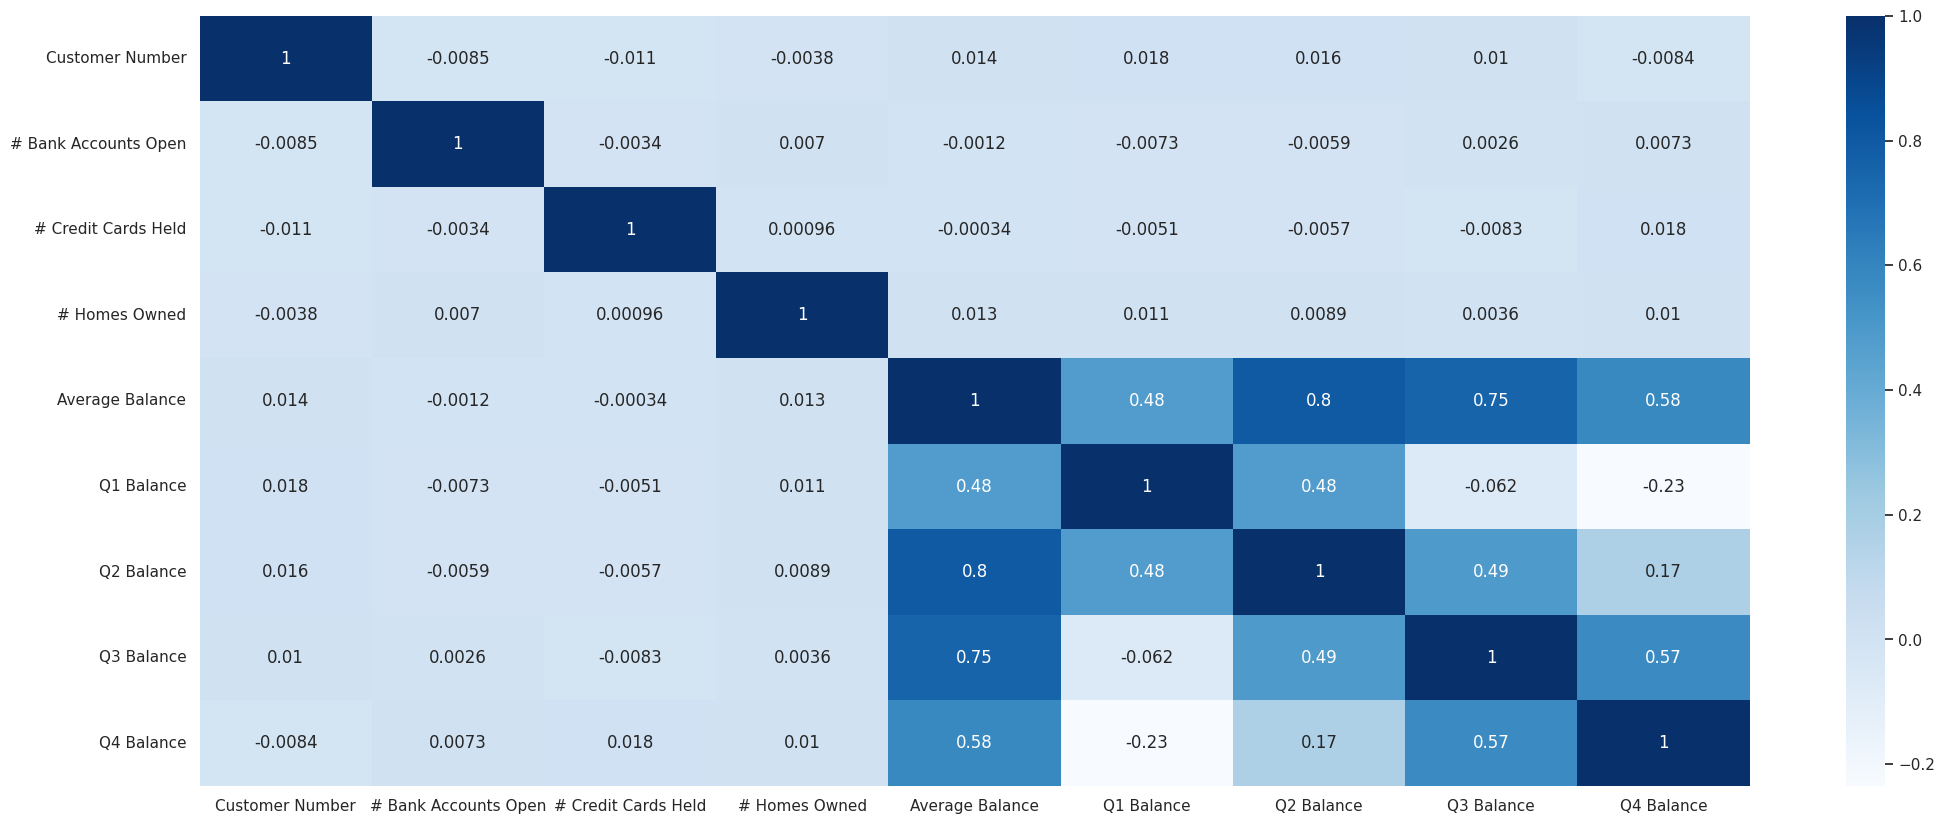

In [258]:
plt.figure(figsize=(25,10))
sns.heatmap(trainset.corr(numeric_only=True), annot=True, cmap='Blues')